<a href="https://colab.research.google.com/github/RupertRiddle/ICC/blob/master/Machine_Learning_Project_Is_it_a_Bird%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install icrawler
from icrawler.builtin import GoogleImageCrawler


%matplotlib inline 

%config InlineBackend.figure_format = 'retina'



import numpy as np

import matplotlib.pyplot as plt

import torch

import torchvision

from torchvision import datasets, transforms, utils, models

from torch import nn

from torch import optim

import torch.nn.functional as F

from torch.optim import lr_scheduler



import os

from textwrap import wrap

from collections import OrderedDict

import time

import copy

from PIL import Image


In [0]:
google_crawler = GoogleImageCrawler(storage={'root_dir': 'birdplanesuperman/bird'})
google_crawler.crawl(keyword='bird', max_num= 500)

2019-12-18 12:14:47,831 - INFO - icrawler.crawler - start crawling...
2019-12-18 12:14:47,833 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-18 12:14:47,835 - INFO - feeder - thread feeder-001 exit
2019-12-18 12:14:47,835 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-18 12:14:47,837 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-12-18 12:14:48,208 - INFO - parser - parsing result page https://www.google.com/search?q=bird&ijn=0&start=0&tbs=&tbm=isch
2019-12-18 12:14:48,435 - INFO - downloader - image #1	https://ichef.bbci.co.uk/news/660/cpsprodpb/67CF/production/_108857562_mediaitem108857561.jpg
2019-12-18 12:14:48,843 - INFO - downloader - image #2	https://upload.wikimedia.org/wikipedia/commons/4/45/Eopsaltria_australis_-_Mogo_Campground.jpg
2019-12-18 12:14:49,010 - INFO - downloader - image #3	https://www.hakaimagazine.com/wp-content/uploads/header-gulf-birds.jpg
2019-12-18 12:14:49,230 - INFO - downloader - image #4	https://www

In [0]:
google_crawler_plane = GoogleImageCrawler(storage={'root_dir': 'birdplanesuperman/plane'})
google_crawler_plane.crawl(keyword='plane', max_num= 500)

2019-12-18 12:18:32,597 - INFO - icrawler.crawler - start crawling...
2019-12-18 12:18:32,598 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-18 12:18:32,601 - INFO - feeder - thread feeder-001 exit
2019-12-18 12:18:32,601 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-18 12:18:32,605 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-12-18 12:18:33,027 - INFO - parser - parsing result page https://www.google.com/search?q=plane&ijn=0&start=0&tbs=&tbm=isch
2019-12-18 12:18:33,207 - INFO - downloader - image #1	https://www.gannett-cdn.com/presto/2019/12/16/PNAS/0ca0a69f-7e9e-4066-9596-24c3b1cec44c-plane.png?width=540&height=&fit=bounds&auto=webp
2019-12-18 12:18:33,404 - INFO - downloader - image #2	https://s3.us-east-1.wasabisys.com/kesq.com/2019/12/12-16-PLANE-LANDING-860x484.png
2019-12-18 12:18:33,537 - INFO - downloader - image #3	https://cdn.cnn.com/cnnnext/dam/assets/190906095526-american-airlines-mechanic-faces-sabotage-charge-mar

In [0]:
google_crawler_superman = GoogleImageCrawler(storage={'root_dir': 'birdplanesuperman/superman'})
google_crawler_superman.crawl(keyword='superman', max_num= 500)

2019-12-18 12:21:40,579 - INFO - icrawler.crawler - start crawling...
2019-12-18 12:21:40,581 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-18 12:21:40,583 - INFO - feeder - thread feeder-001 exit
2019-12-18 12:21:40,583 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-18 12:21:40,587 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-12-18 12:21:41,155 - INFO - parser - parsing result page https://www.google.com/search?q=superman&ijn=0&start=0&tbs=&tbm=isch
2019-12-18 12:21:41,311 - INFO - downloader - image #1	https://static1.cbrimages.com/wordpress/wp-content/uploads/2019/12/crisis-brandon-routh-superman.jpg?q=50&fit=crop&w=798&h=407
2019-12-18 12:21:41,412 - INFO - downloader - image #2	https://upload.wikimedia.org/wikipedia/en/3/35/Supermanflying.png
2019-12-18 12:21:41,499 - INFO - downloader - image #3	https://static2.cbrimages.com/wordpress/wp-content/uploads/2019/12/crisis-routh-superman.jpg
2019-12-18 12:21:41,718 - INFO - dow

In [0]:
!pip install split_folders
import split_folders

In [0]:
split_folders.ratio('birdplanesuperman',output = 'birdplanesuperman', ratio= (0.8, 0.1, 0.1))

Copying files: 1256 files [00:00, 2050.52 files/s]


In [0]:
# Torchvision transforms used to augment the training data with random scaling, rotations, mirroring and cropping

# The training, validation and testing data appropriately cropped and normalized

# The data for each set is loaded with torchvision's DataLoader

# The data for each set (train, validation, test) is loaded with torchvision's ImageFolder

normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

data_transforms = {

    'train': transforms.Compose([

        transforms.RandomRotation(30),

        transforms.RandomResizedCrop(224),

        transforms.RandomHorizontalFlip(),

        transforms.ToTensor(),

        normalize

    ]),

    'test': transforms.Compose([

        transforms.Resize(256),

        transforms.CenterCrop(224),

        transforms.ToTensor(),

        normalize

    ]),

    'valid': transforms.Compose([

        transforms.Resize(256),

        transforms.CenterCrop(224),

        transforms.ToTensor(),

        normalize

    ]),

}

data_dir = 'birdplanesuperman'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),

                                          data_transforms[x])

                  for x in ['train', 'test', 'valid']}



dataset_sizes = {x: len(image_datasets[x]) 

                              for x in ['train', 'test', 'valid']}



dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,

                                             shuffle=True)

              for x in ['train', 'test', 'valid']}

In [0]:
from google.colab import drive
drive.mount('/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


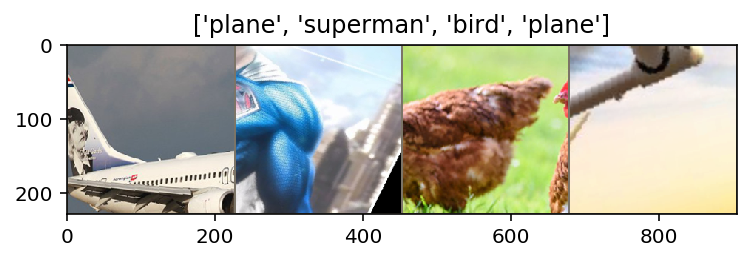

In [0]:
def initial_imshow(inp, title=None):

    inp = inp.numpy().transpose((1, 2, 0))

    # unnormalizing 

    mean = np.array([0.485, 0.456, 0.406])

    std = np.array([0.229, 0.224, 0.225])

    inp = std * inp + mean

    inp = np.clip(inp, 0, 1)

    plt.imshow(inp)

    if title is not None:

        plt.title(title)

    plt.pause(0.001)  



(inputs, classes) = next(iter(dataloaders['train']))

# Lets only show 16 images for visibility 

(inputs, classes) = inputs[16:20], classes[16:20]

out = torchvision.utils.make_grid(inputs)

class_names = image_datasets['train'].classes

initial_imshow(out, title=([class_names[x] for x in classes]))

In [0]:

model = models.densenet201(pretrained=True)



# freezing the model parameters

for param in model.parameters():

    param.requires_grad = False



# out input_size matches the in_features of pretrained model

input_size = 1920

output_size = 3

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:04<00:00, 17.8MB/s]


In [0]:
classifier_dict = OrderedDict([

    ('fc1', nn.Linear(input_size, 512)),

    ('relu1', nn.ReLU()),

    ('dropout1', nn.Dropout(p=0.2)),

    ('fc2', nn.Linear(512, 128)),

    ('relu2', nn.ReLU()),

    ('dropout2', nn.Dropout(p=0.2)),

    ('fc3', nn.Linear(128, output_size)),

    ('output', nn.LogSoftmax(dim=1)),

    ])

    

# creating the classifier for our usage using the ordered dictionary

classifier = nn.Sequential(classifier_dict)



# replacing the pretrained model classifier with our classifier

model.classifier = classifier

In [0]:

# defining the criterion and optimizer



# NLLLoss because our output is LogSoftmax

criterion = nn.NLLLoss()



# Adam optimizer with a learning rate

optimizer = optim.Adam(model.classifier.parameters(), lr = 0.001)



# Decay LR by a factor of 0.1 every 5 epochs

exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [0]:
def calc_accuracy(model, data, cuda):

    accuracy_list = []

    if (cuda):

        model.cuda()

    model.eval()    

    with torch.no_grad():

        for idx, (inputs, labels) in enumerate(dataloaders[data]):

            if cuda:

                inputs, labels = inputs.cuda(), labels.cuda()

            outputs = model.forward(inputs)

            _, predicted = outputs.max(dim=1)

            print ('\nBatch no ----- ', idx+1)

            print('Predicted Class: ', predicted) 

            print('Probability: ', torch.exp(_)) 

            equals = predicted == labels.data

            print('Correctly predicted: ', equals)

            batch_accuracy = equals.float().mean().item()

            accuracy_list.append(batch_accuracy)

            print('Batch accuracy: ',batch_accuracy)

        print('\n Mean accuracy: ', np.mean(accuracy_list))



# creating a cuda boolean for availability of cuda

cuda = torch.cuda.is_available()



# calculating the accuracy of the model on test data before training

calc_accuracy(model, 'test', cuda)


Batch no -----  1
Predicted Class:  tensor([1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
        2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1,
        2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2])
Probability:  tensor([0.3622, 0.3599, 0.3581, 0.3507, 0.3653, 0.3640, 0.3485, 0.3469, 0.3546,
        0.3475, 0.3548, 0.3499, 0.3403, 0.3552, 0.3430, 0.3510, 0.3539, 0.3461,
        0.3456, 0.3466, 0.3542, 0.3542, 0.3514, 0.3615, 0.3616, 0.3560, 0.3584,
        0.3533, 0.3515, 0.3556, 0.3571, 0.3606, 0.3579, 0.3478, 0.3544, 0.3513,
        0.3449, 0.3482, 0.3607, 0.3585, 0.3581, 0.3636, 0.3564, 0.3470, 0.3506,
        0.3584, 0.3572, 0.3548, 0.3617, 0.3597, 0.3578, 0.3504, 0.3559, 0.3525,
        0.3466, 0.3531, 0.3545, 0.3441, 0.3624, 0.3457, 0.3631, 0.3501, 0.3509,
        0.3492])
Correctly predicted:  tensor([ True, False, False, False,  True, False,  True, False,  True,  True,
        False, False,  True,  True,  True,  True, False

In [0]:
# Training the model

# Validation loss and accuracy are displayed

def train_model(model, criterion, optimizer, scheduler, num_epochs, cuda):

    since = time.time()



    best_model_wts = copy.deepcopy(model.state_dict())

    best_acc = 0.0

    

    if (cuda):

        model.cuda()

        

    for epoch in range(num_epochs):

        print('Epoch {}/{}'.format(epoch, num_epochs - 1))

        print('-' * 10)



        # Each epoch has a training and validation phase

        for phase in ['train', 'valid']:

            if phase == 'train':

                scheduler.step()

                model.train()  # Set model to training mode

            else:

                model.eval()   # Set model to evaluate mode



            running_loss = 0.0

            running_corrects = 0



            # Iterate over data.

            for inputs, labels in dataloaders[phase]:

                if (cuda):

                    inputs = inputs.cuda()

                    labels = labels.cuda()



                # zero the parameter gradients

                optimizer.zero_grad()



                # forward

                # track history if only in train

                with torch.set_grad_enabled(phase == 'train'):

                    outputs = model(inputs)

                    _, preds = torch.max(outputs, 1)

                    loss = criterion(outputs, labels)



                    # backward + optimize only if in training phase

                    if phase == 'train':

                        loss.backward()

                        optimizer.step()



                # statistics

                running_loss += loss.item() * inputs.size(0)

                running_corrects += torch.sum(preds == labels.data)



            epoch_loss = running_loss / dataset_sizes[phase]

            epoch_acc = running_corrects.double() / dataset_sizes[phase]



            print('{} Loss: {:.4f} Acc: {:.4f}'.format(

                phase, epoch_loss, epoch_acc))



            # deep copy the model

            if phase == 'valid' and epoch_acc > best_acc:

                best_acc = epoch_acc

                best_model_wts = copy.deepcopy(model.state_dict())



        print()



    time_elapsed = time.time() - since

    print('Training complete in {:.0f}m {:.0f}s'.format(

        time_elapsed // 60, time_elapsed % 60))

    print('Best val Acc: {:4f}'.format(best_acc))



    # load best model weights

    model.load_state_dict(best_model_wts)

    return model



# training the model

trained_model = train_model(model, criterion, optimizer, exp_lr_scheduler, 5, cuda)

Epoch 0/4
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


train Loss: 0.4386 Acc: 0.8650
valid Loss: 0.0667 Acc: 0.9754

Epoch 1/4
----------
train Loss: 0.1655 Acc: 0.9490
valid Loss: 0.0965 Acc: 0.9754

Epoch 2/4
----------
train Loss: 0.1249 Acc: 0.9670
valid Loss: 0.0355 Acc: 0.9836

Epoch 3/4
----------
train Loss: 0.0695 Acc: 0.9720
valid Loss: 0.0400 Acc: 0.9836

Epoch 4/4
----------
train Loss: 0.0597 Acc: 0.9750
valid Loss: 0.0372 Acc: 0.9836

Training complete in 21m 11s
Best val Acc: 0.983607


In [0]:
def image_preprocessing(image_path):

    im = Image.open(image_path)

    if (im.size[0] < im.size[1]):

        im.thumbnail((256, 10000), Image.ANTIALIAS)

    else:

        im.thumbnail((10000, 256), Image.ANTIALIAS)

    

    left =  (im.width-224)/2

    lower = (im.height-224)/2

    right = left+224

    upper = lower+224

    box = (left, lower, right, upper)

    im = im.crop(box)

    

    np_im = np.array(im)/225

    np_im = (np_im - np.array([0.485, 0.456, 0.406]))/np.array([0.229, 0.224, 0.225])

    np_im = np_im.transpose((2,0,1))

    return np_im        

    

    

# Function that plots preprocessed image

def imshow(image, ax=None, title=None):

    if ax is None:

        fig, ax = plt.subplots()

    if title:

        plt.title(title)

    image = image.transpose((1, 2, 0))

    

    mean = np.array([0.485, 0.456, 0.406])

    std = np.array([0.229, 0.224, 0.225])

    image = std * image + mean

    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

    



In [25]:
# Predict function for top k features
def predict(image_path, model, cuda):
    if (cuda):
        model = model.cpu()
    processed_image = image_preprocessing(image_path)
    processed_image_float = torch.from_numpy(processed_image).type(torch.FloatTensor)
    # adding batch size of 1
    processed_image_float.unsqueeze_(0)
    output = model.forward(processed_image_float)
    probability = torch.exp(output)
    probs, classes = probability.topk(3)
    probs = probs.detach().numpy().tolist()[0] 
    classes = classes.detach().numpy().tolist()[0]
    idx_to_class = {val: key for key, val in    
                        image_datasets['train'].class_to_idx.items()}
    labels = [idx_to_class[label] for label in classes]
    return probs, labels
    
 # Testing the predict function
predict(os.path.join(data_dir, 'test/superman/000010.jpg'), trained_model, cuda)



([0.9998096823692322, 0.00016956005129031837, 2.0828085325774737e-05],
 ['superman', 'bird', 'plane'])

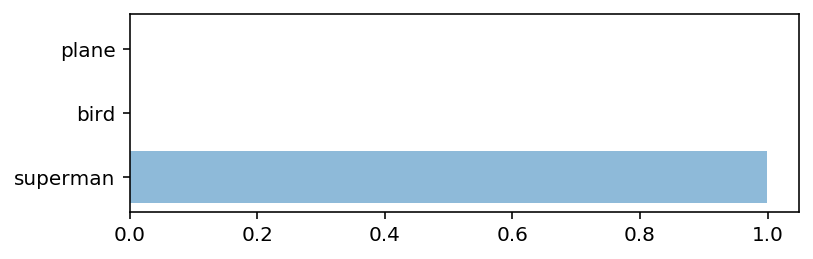

In [26]:
# Testing the imshow function

imshow(image_preprocessing(os.path.join(data_dir, 'test/superman/000010.jpg')), title='Preprocessed image')

# Function that plots top k probabilities associated with input 
def plot_solution(image_path, model):

    
    probs, labels = predict(image_path, model, cuda) 
    plt.subplot(2,1,2)
    plt.barh(labels, probs, align='center', alpha=0.5)
    plt.show()
    
# Testing the plot_solutions function
plot_solution(os.path.join(data_dir, 'test/superman/000010.jpg'), trained_model)

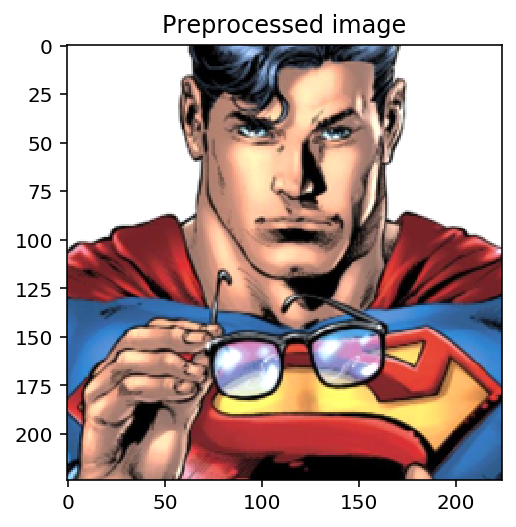

In [123]:
imshow(image_preprocessing(os.path.join(data_dir, 'test/superman/000010.jpg')), title='Preprocessed image')

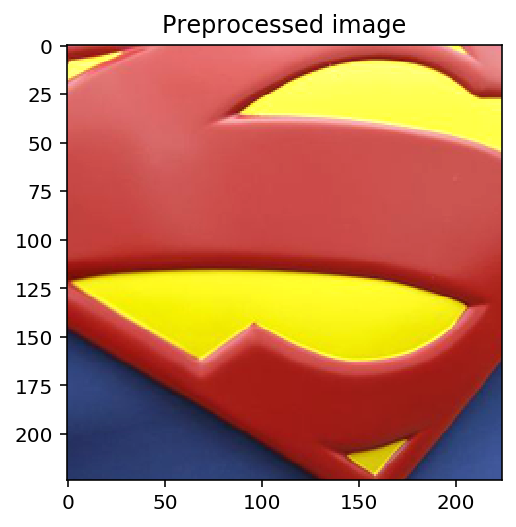

In [116]:
imshow(image_preprocessing(os.path.join(data_dir, 'test/superman/000317.jpeg')), title='Preprocessed image')

In [0]:
def vis_prediction(model, classs, cuda):
        for filename in os.listdir('birdplanesuperman/test/'+classs):
          try:
            x = predict(os.path.join(data_dir, 'test/'+classs+'/'+filename), model, cuda)
            print(imshow(image_preprocessing(os.path.join(data_dir, 'test/'+classs+'/'+filename)), title = x))

          except:
            continue
    
      

      
    
  
   


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


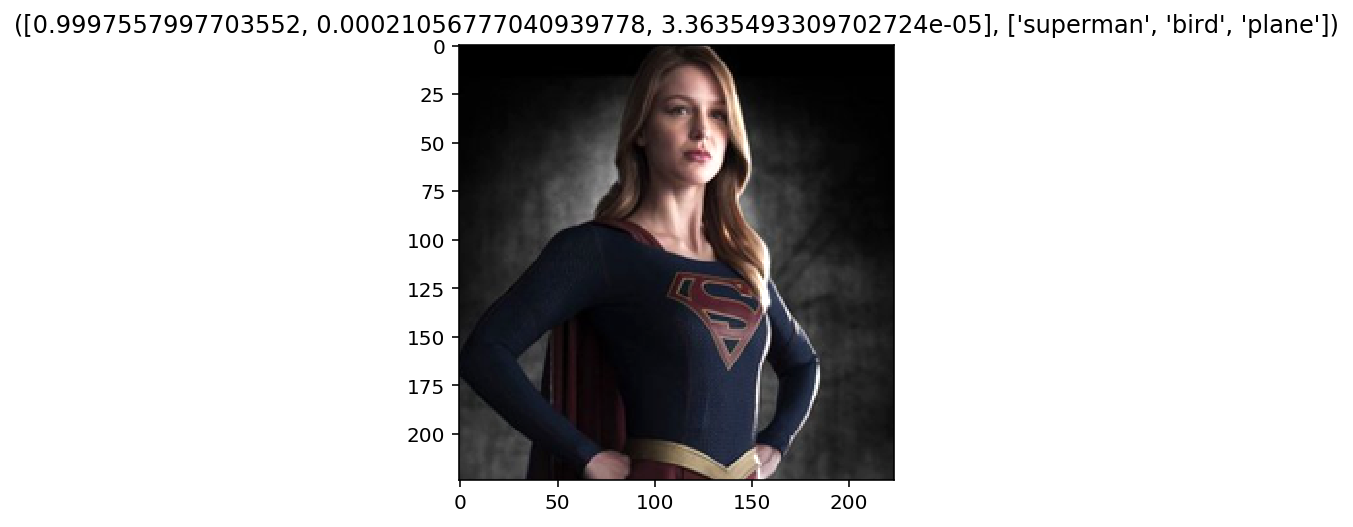

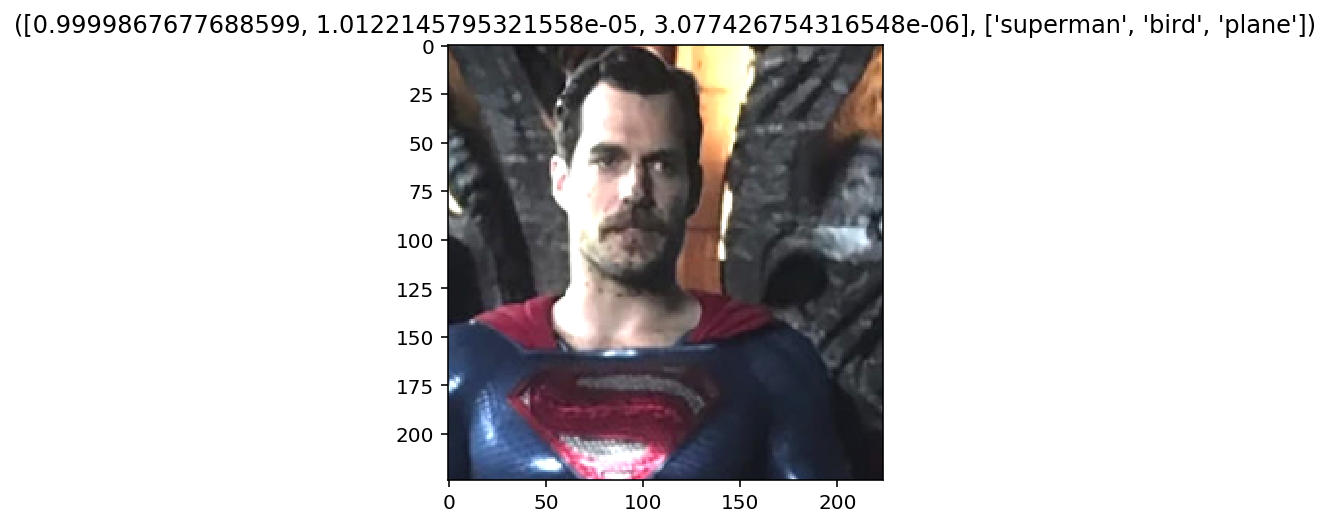

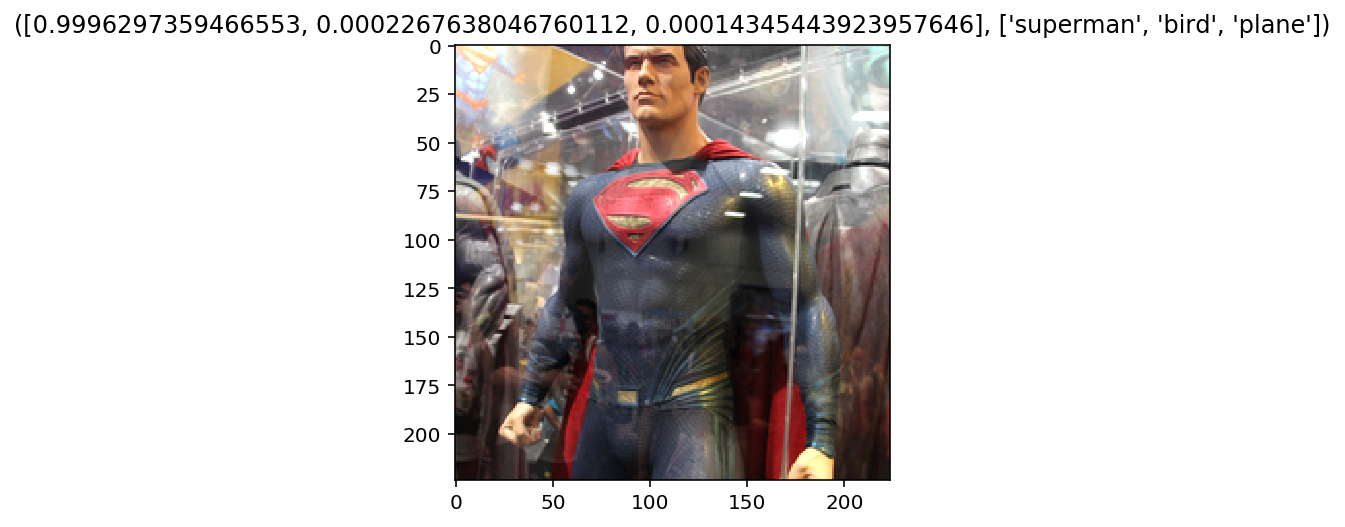

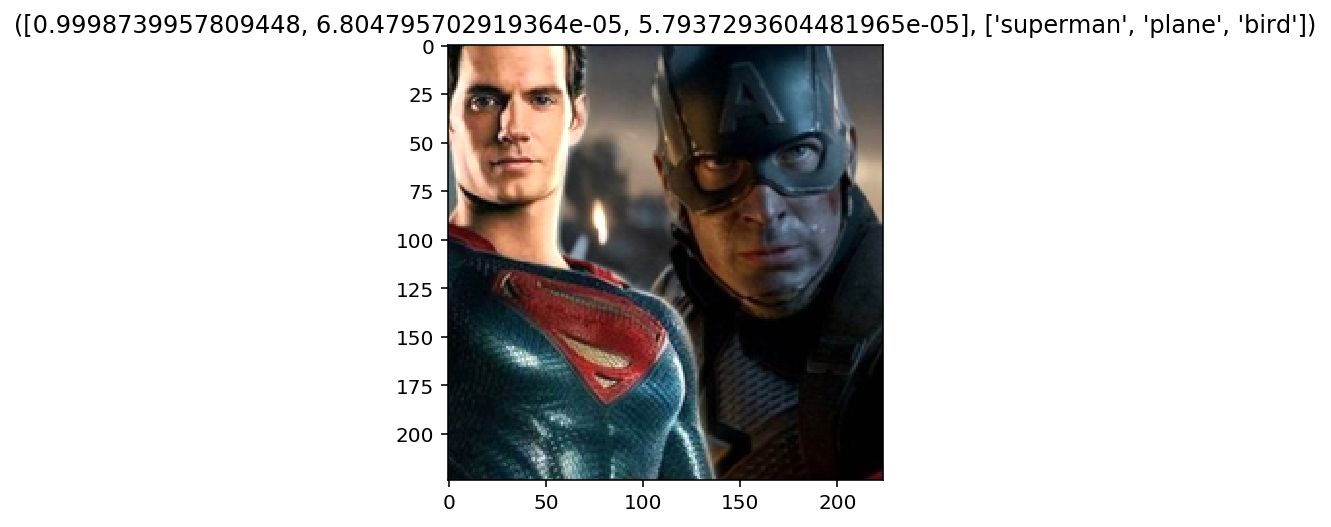

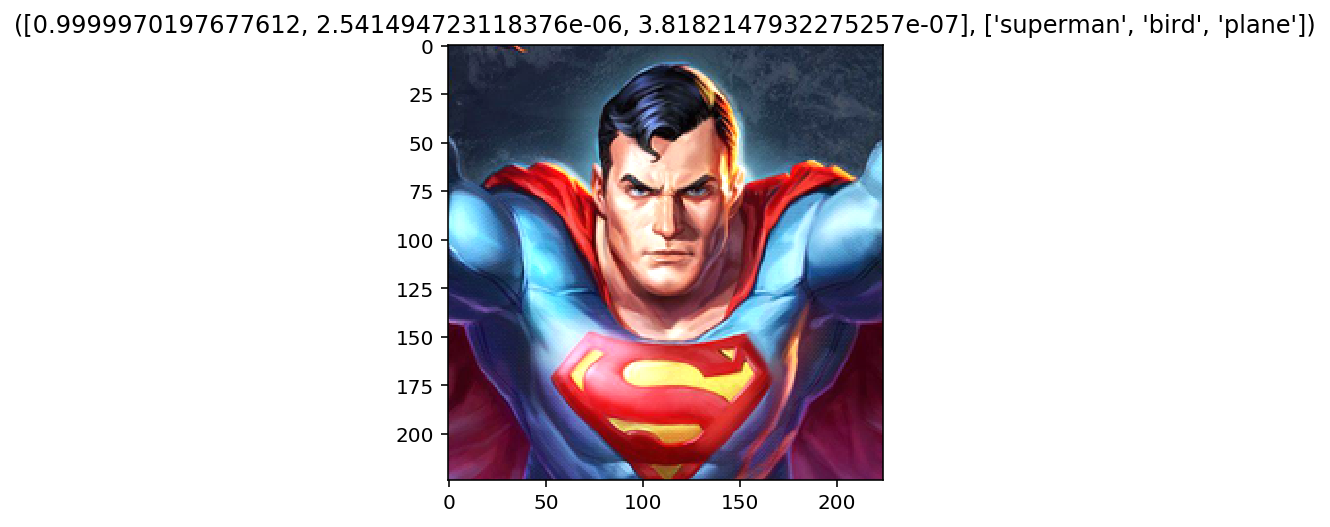

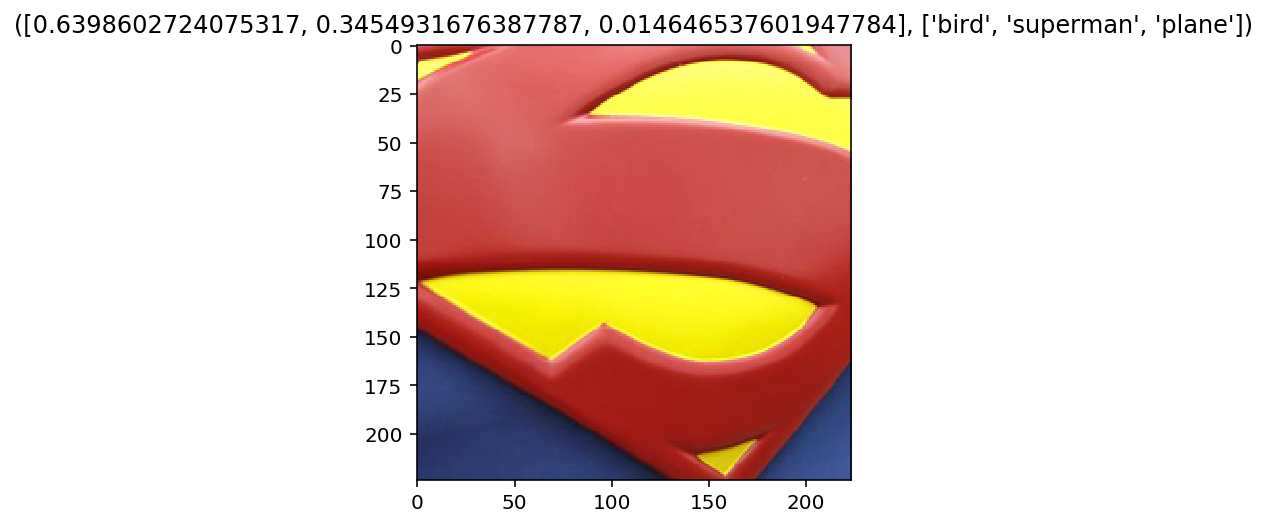

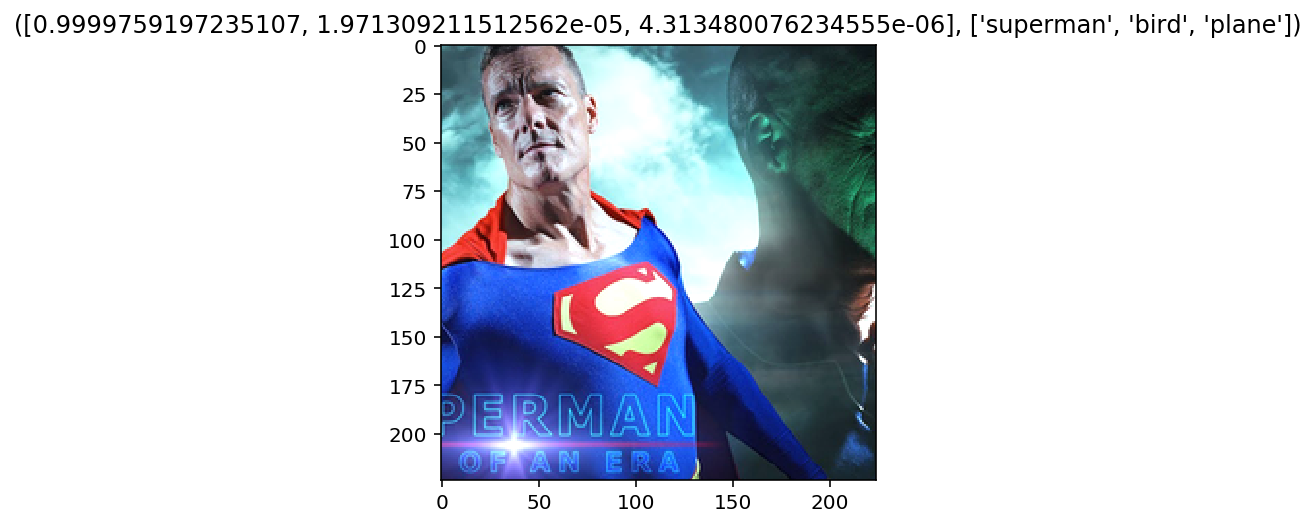

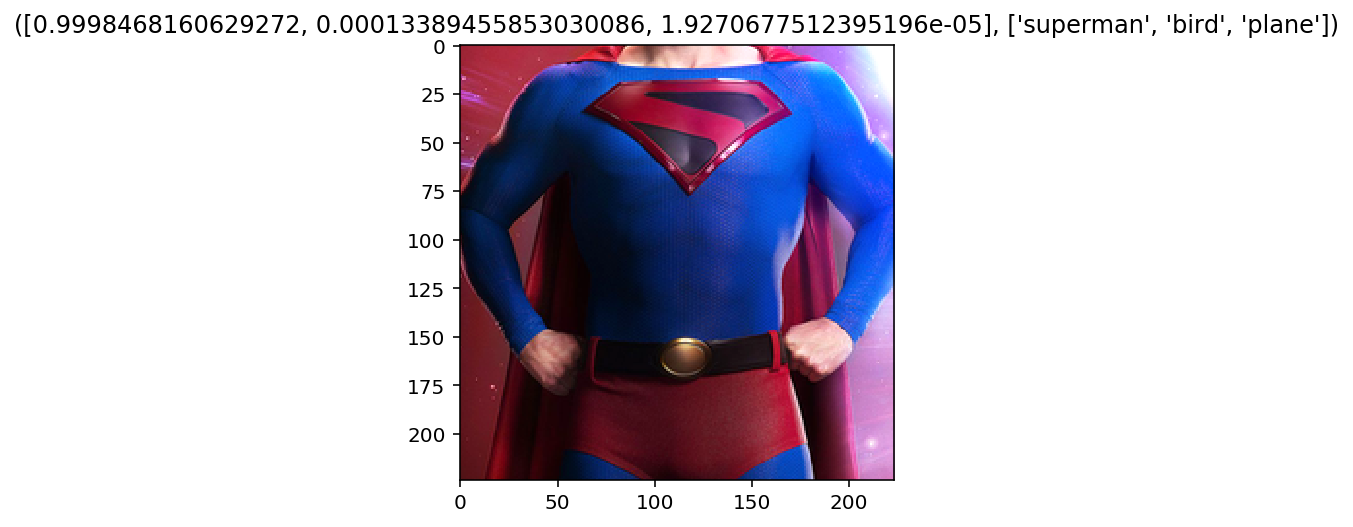

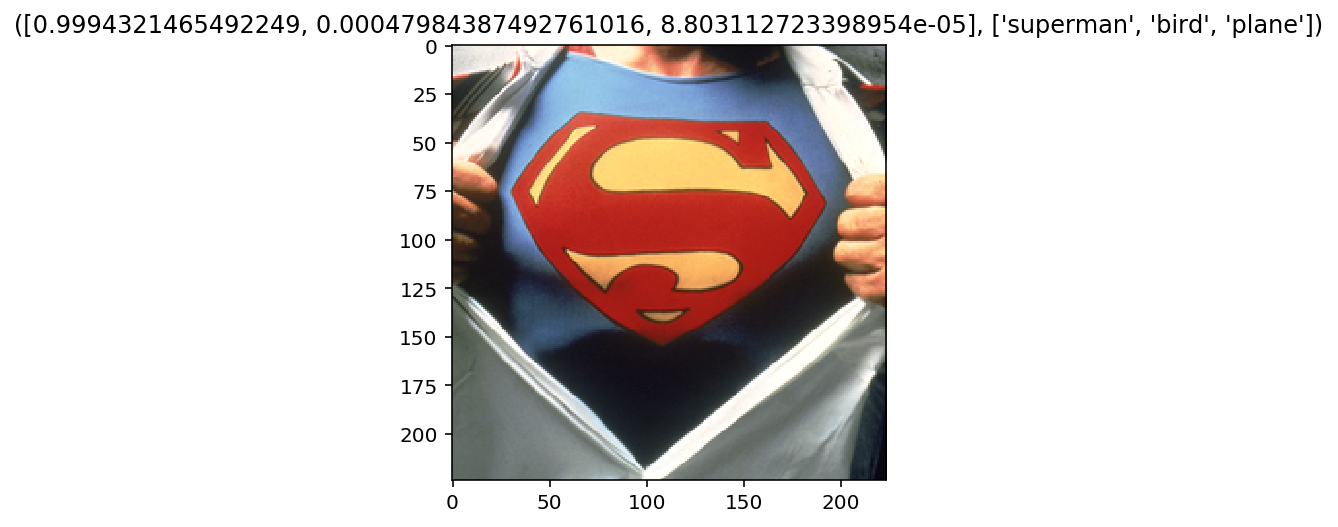

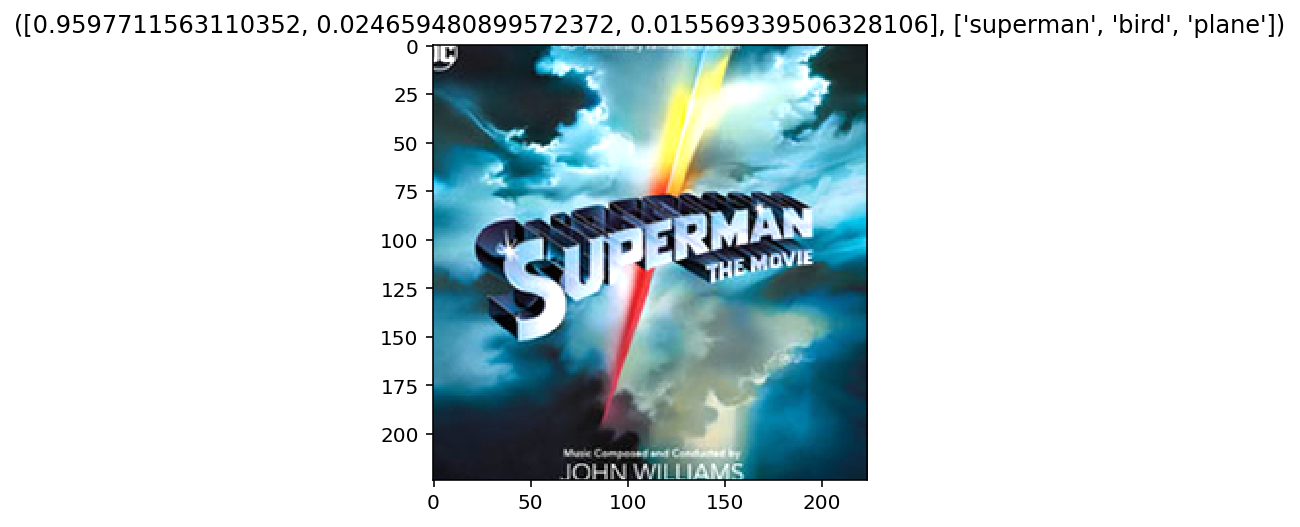

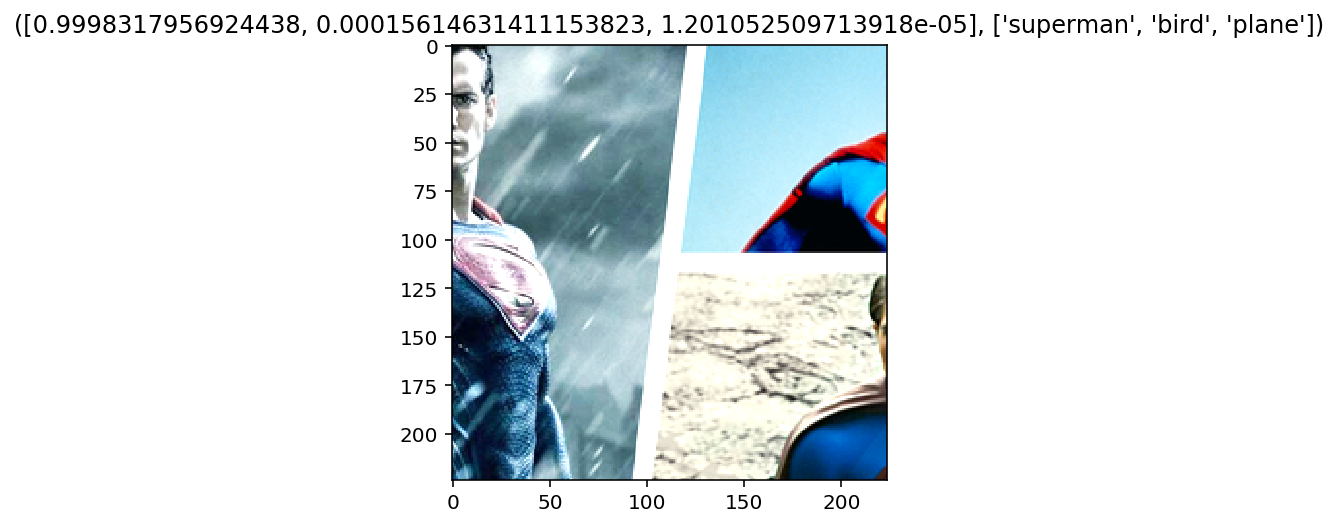

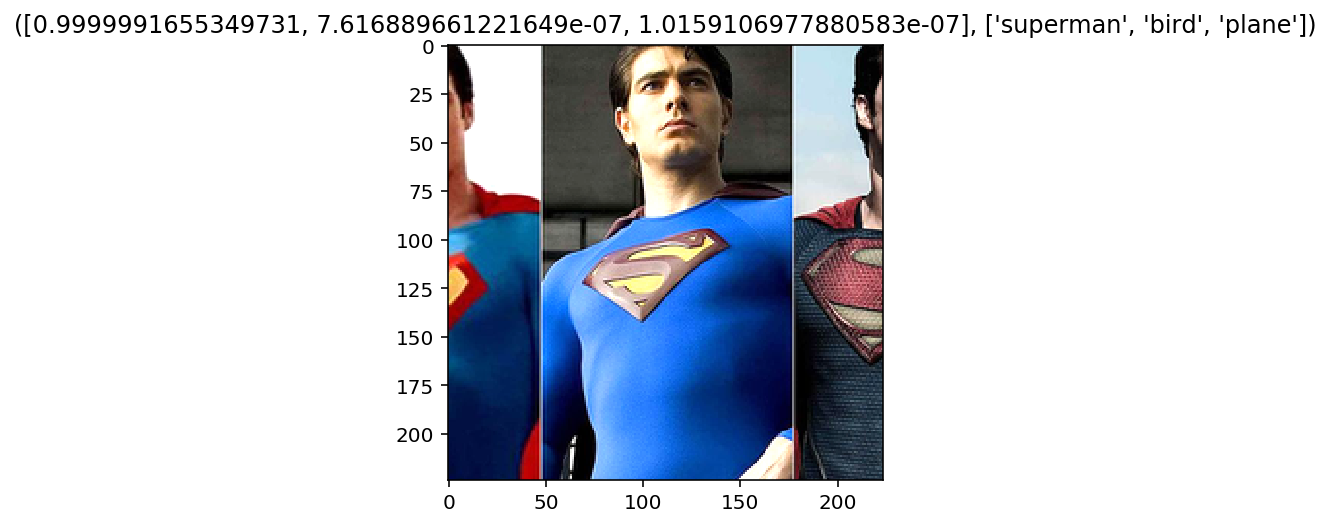

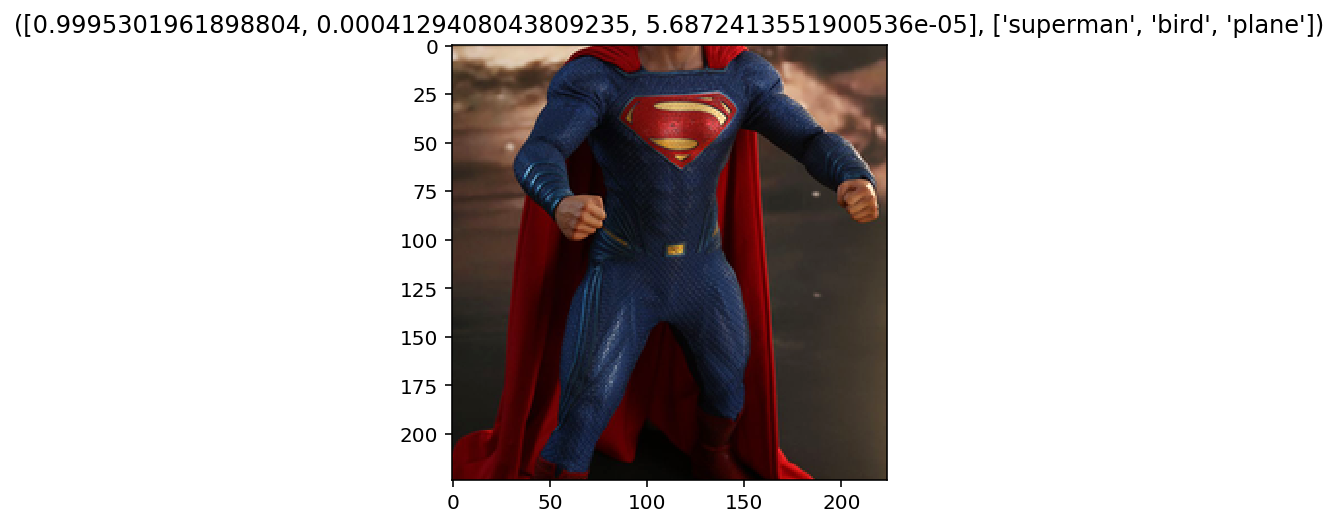

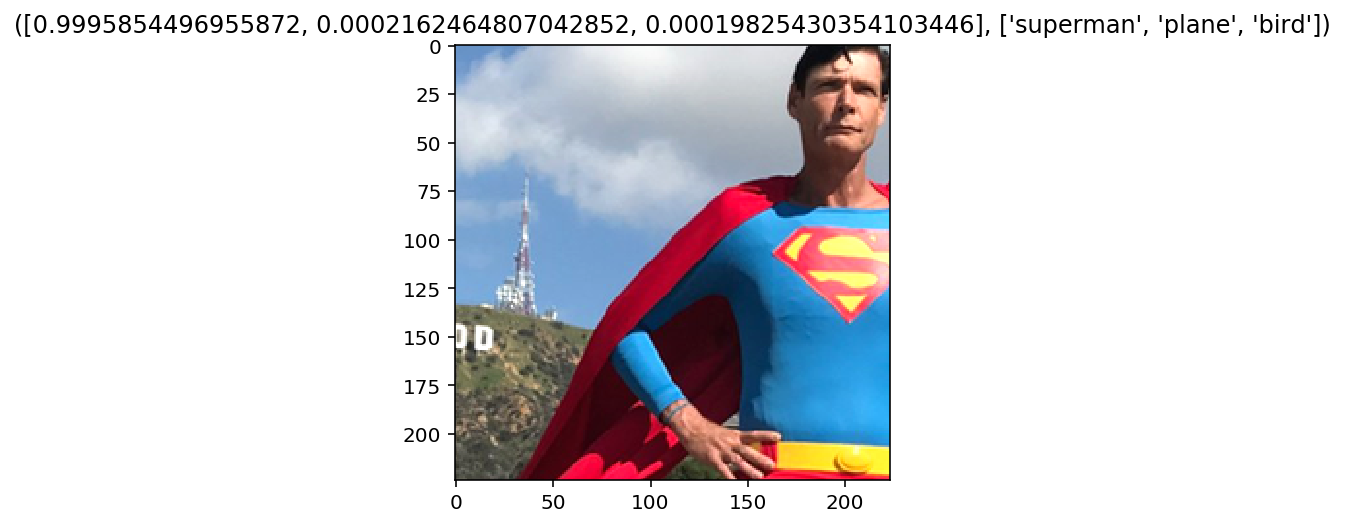

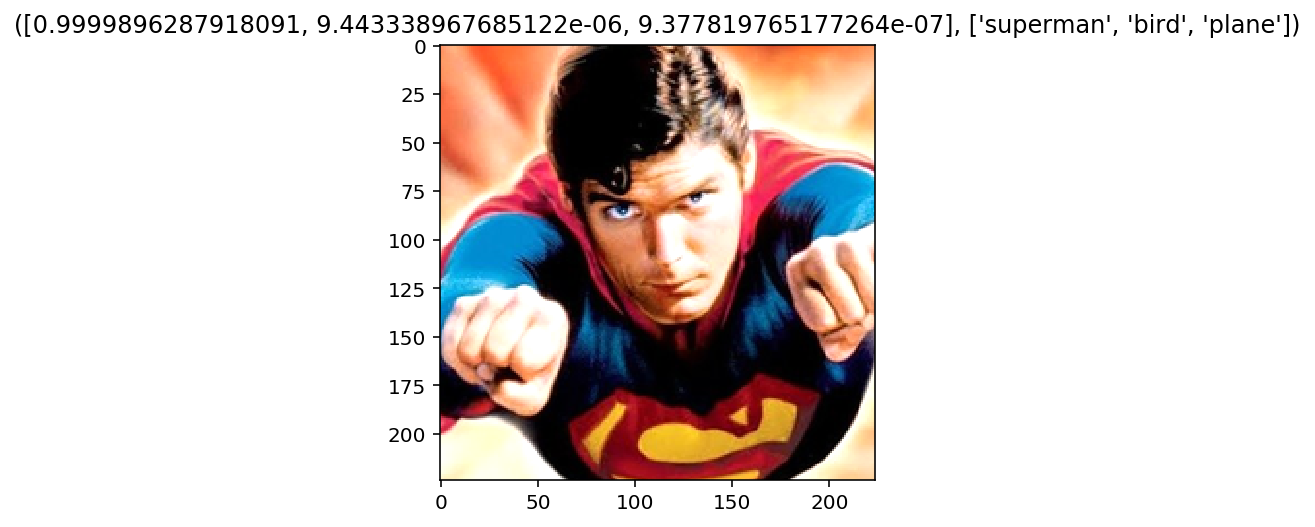

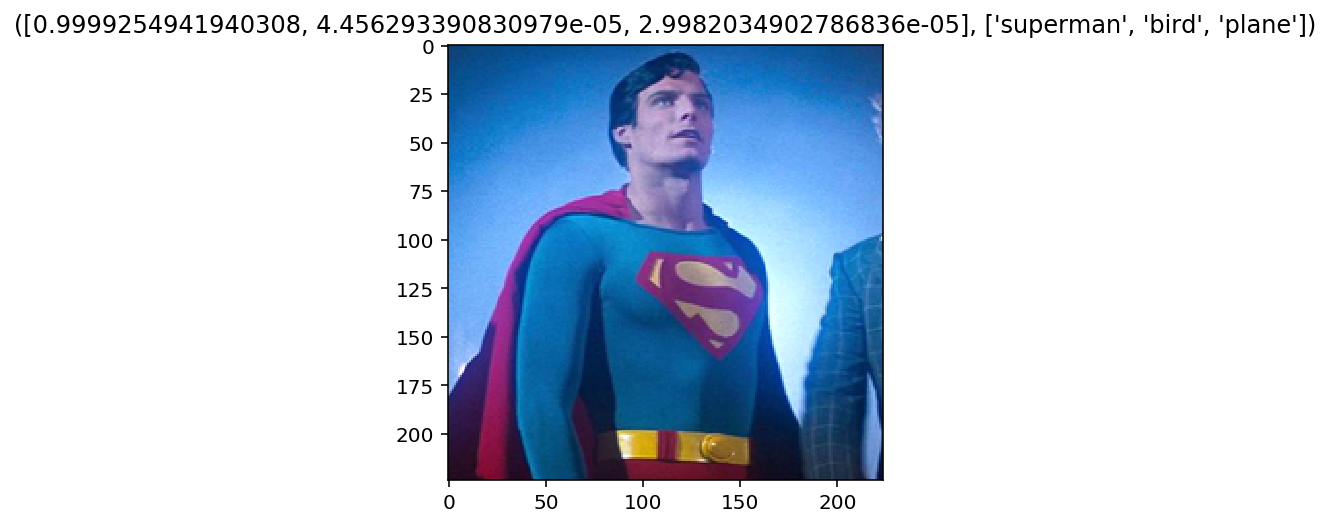

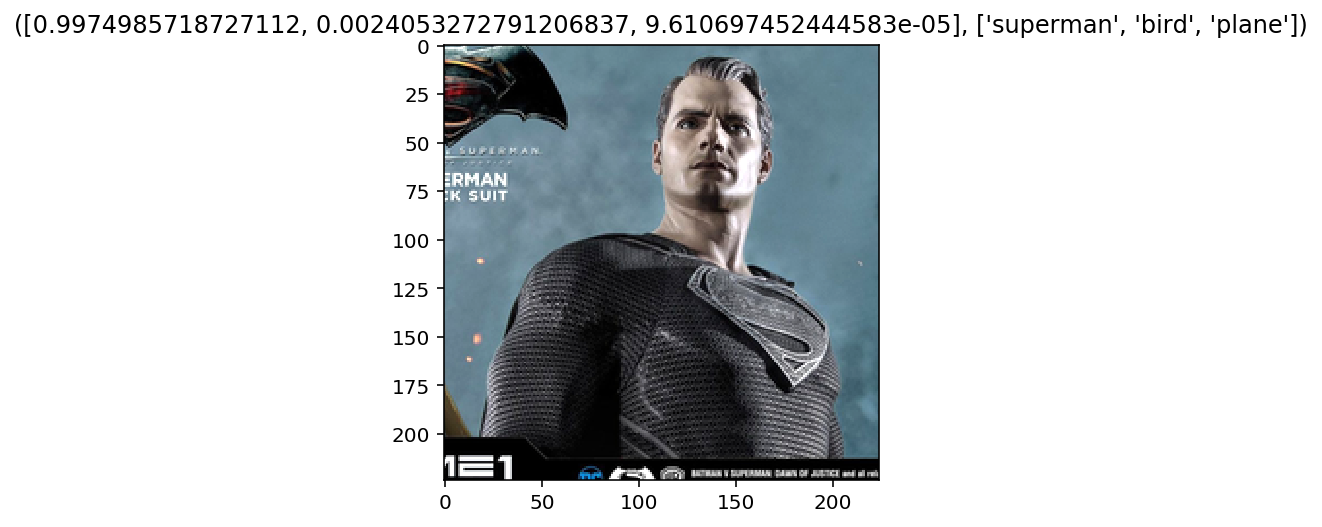

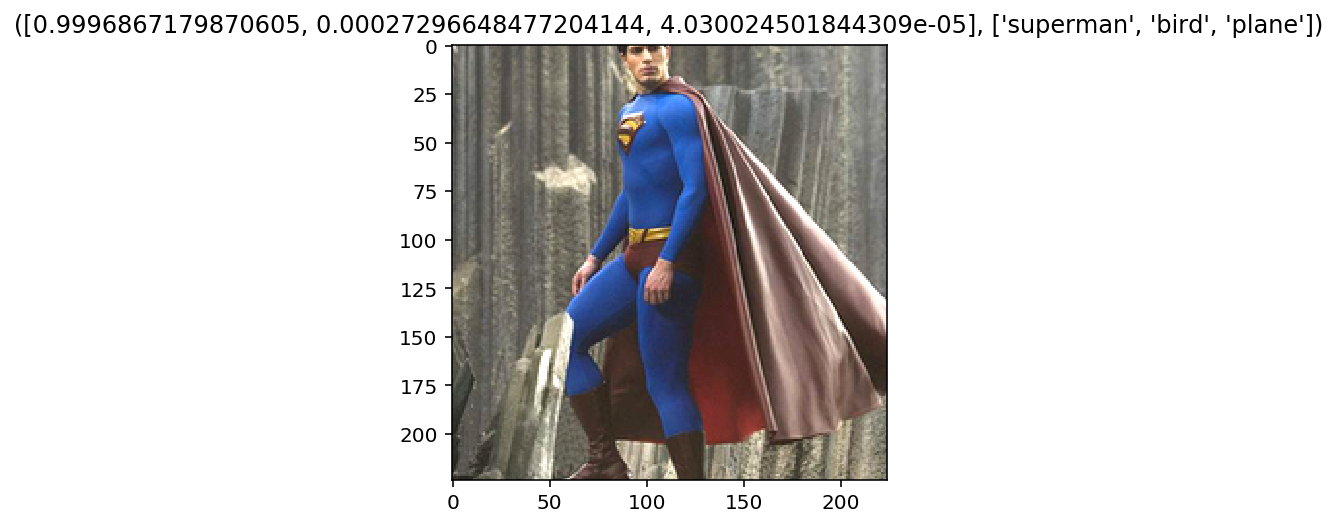

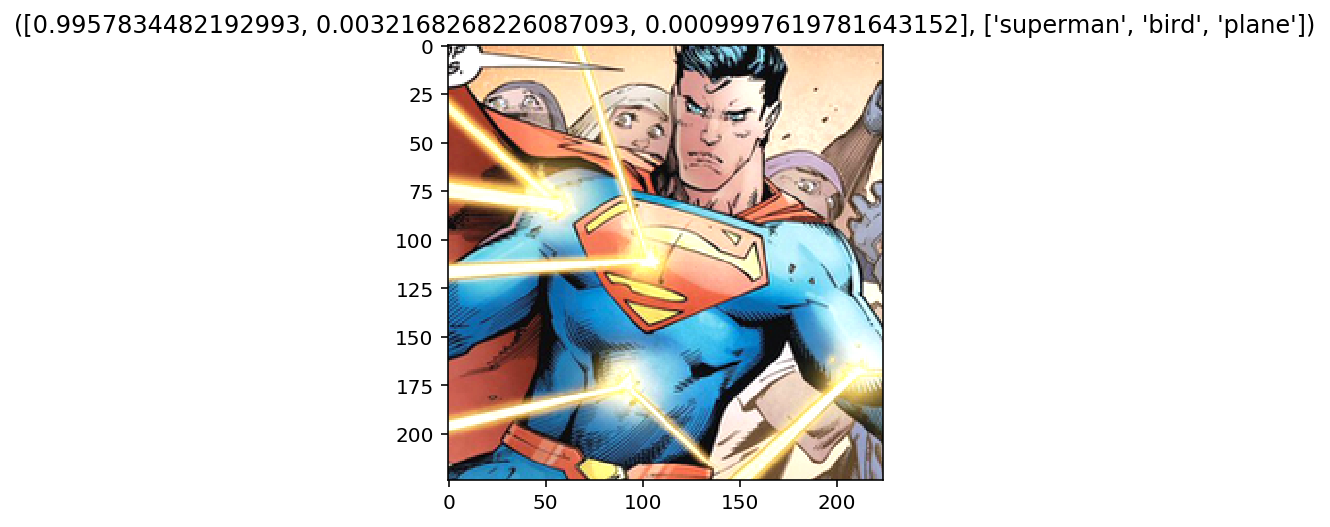

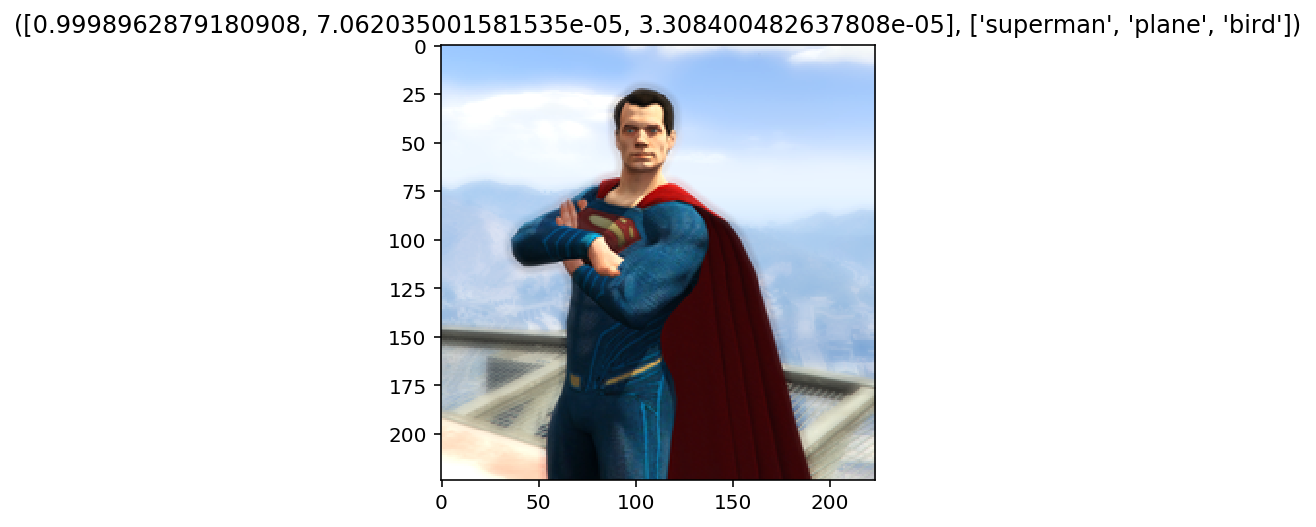

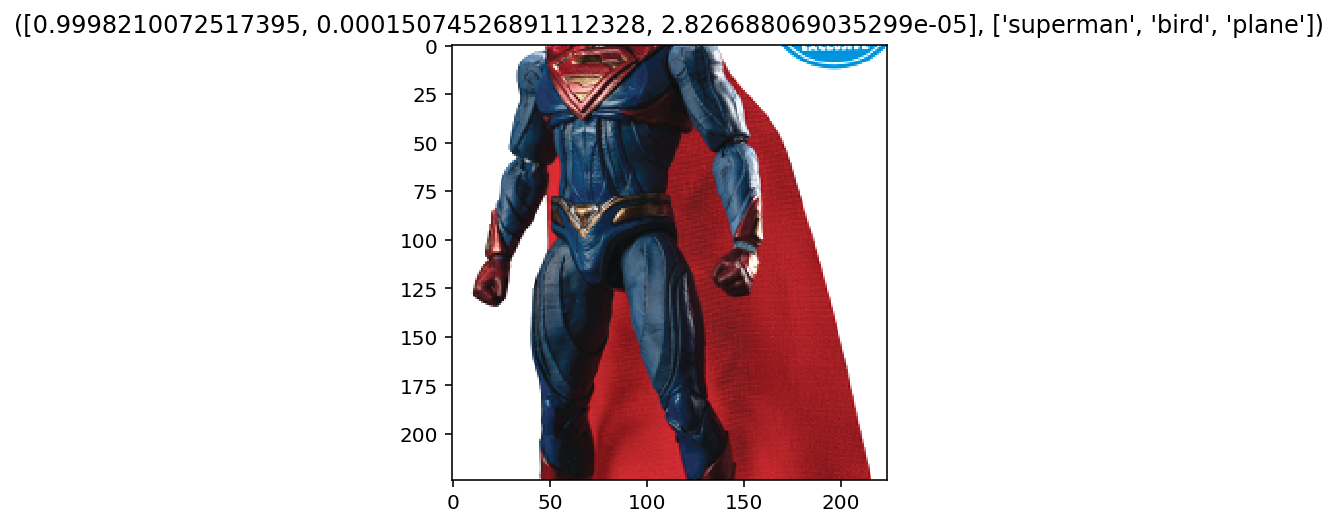

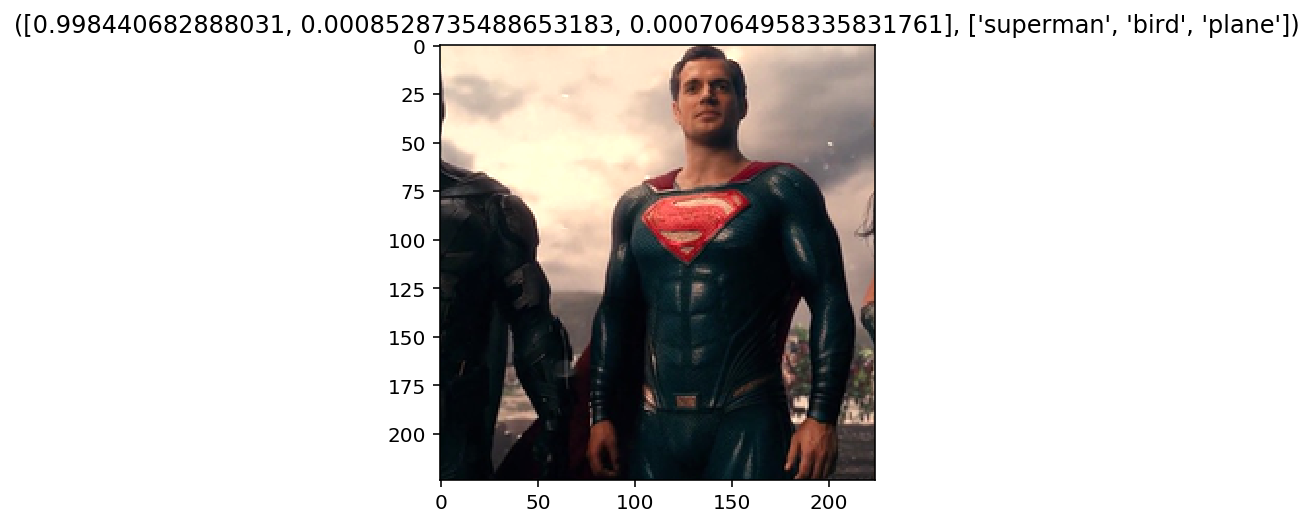

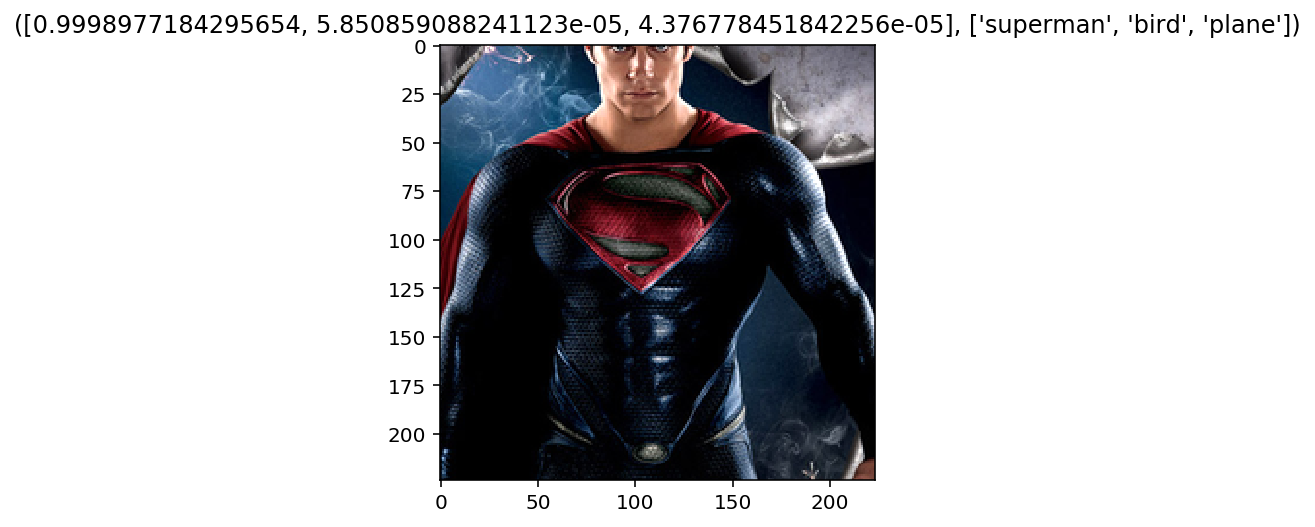

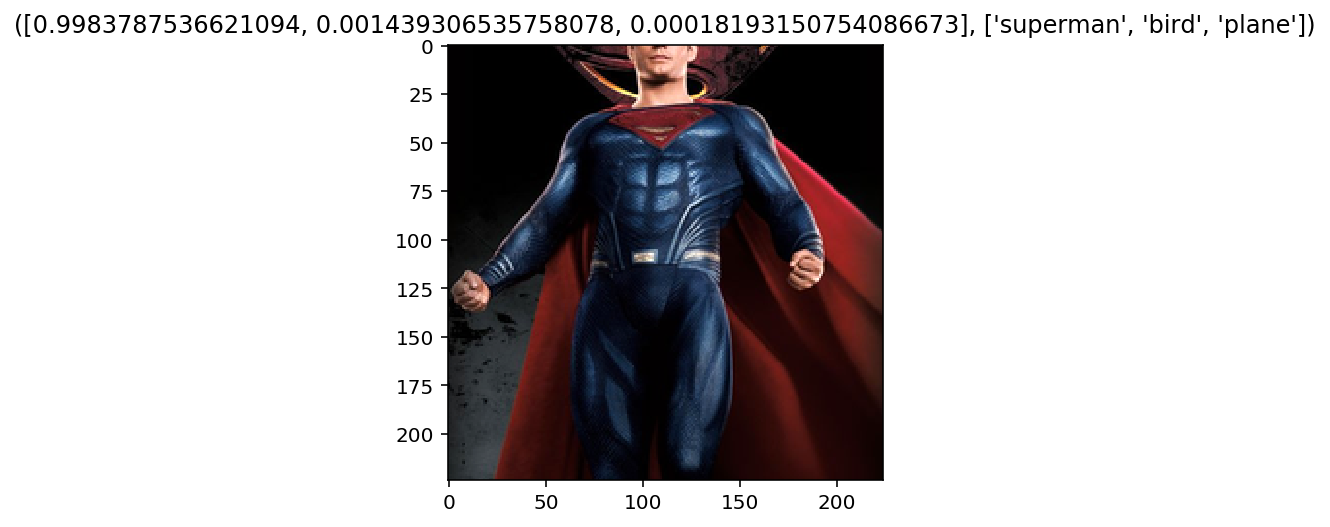

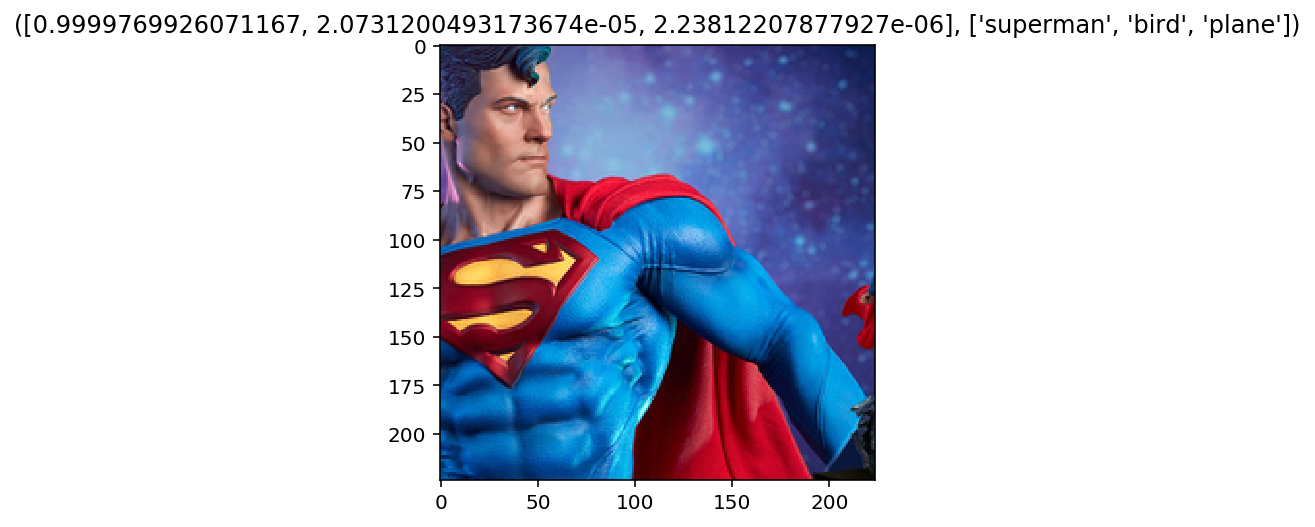

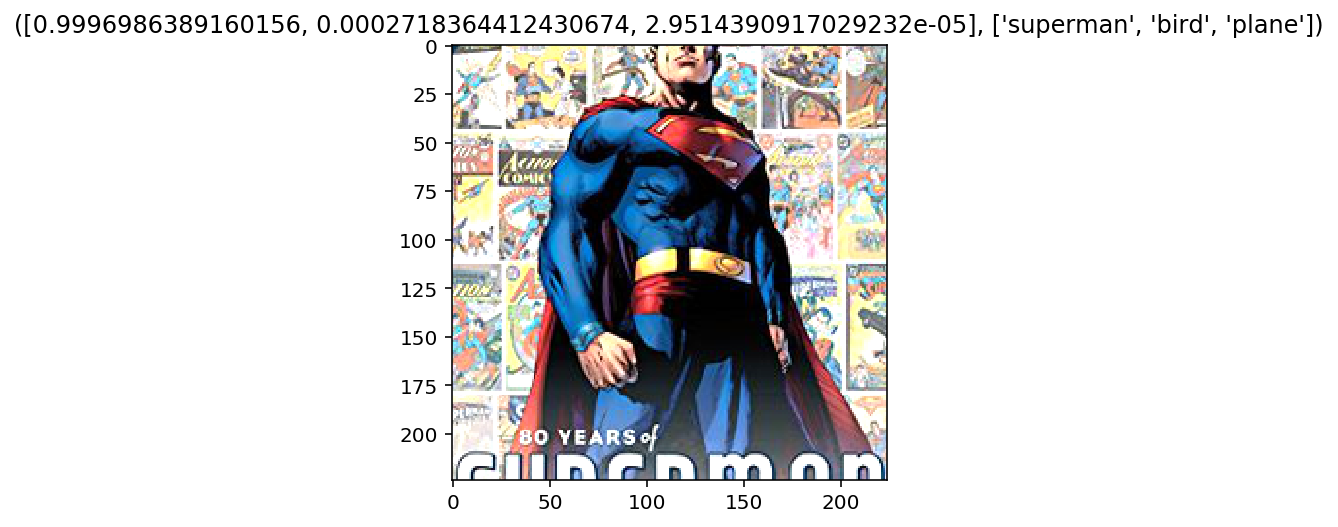

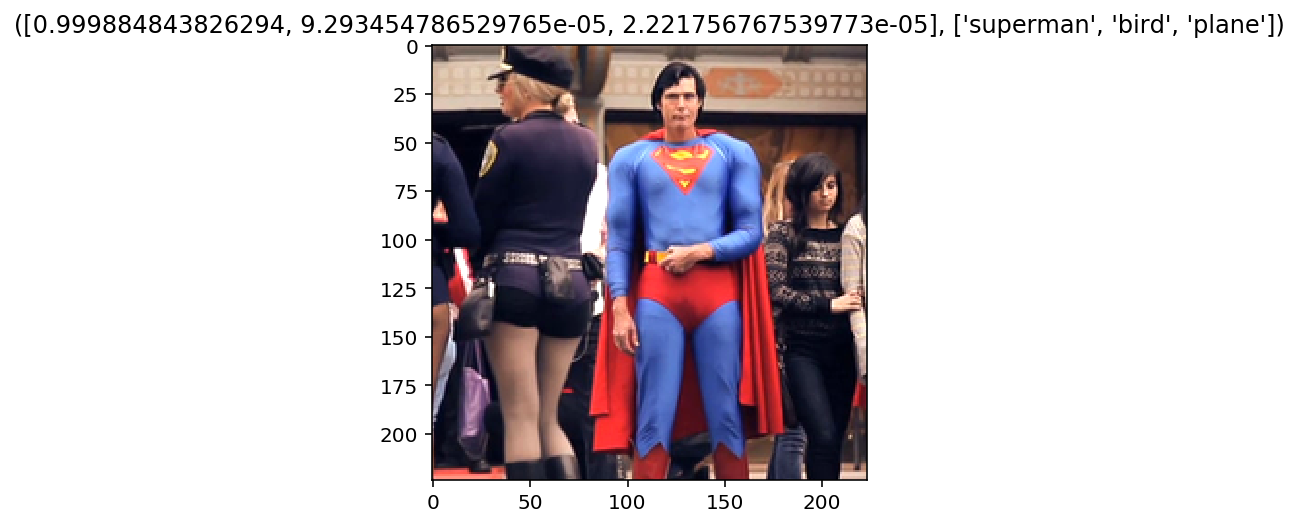

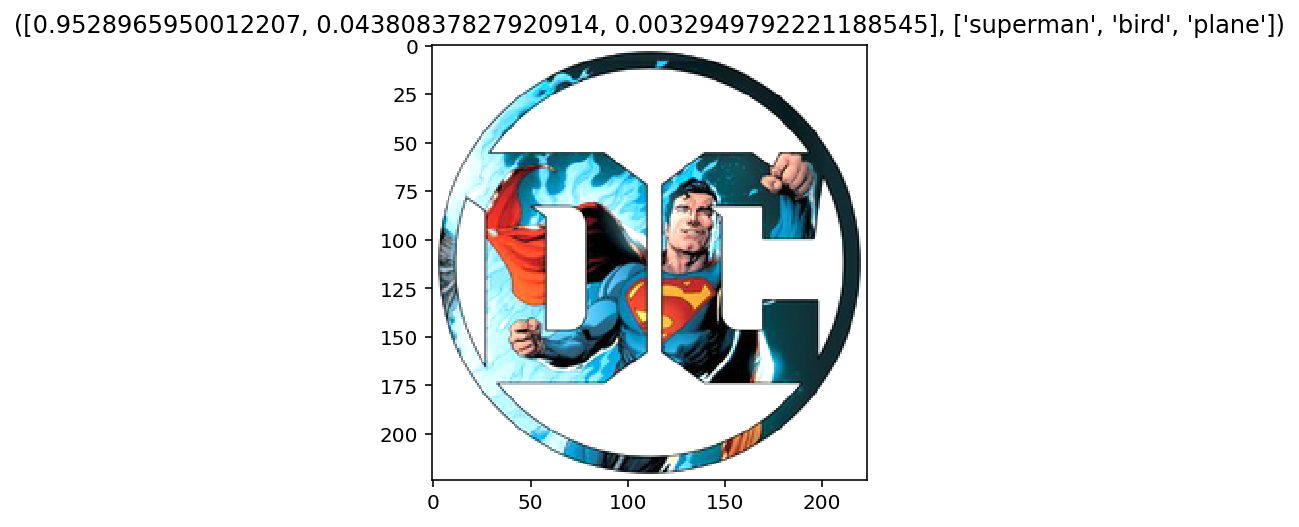

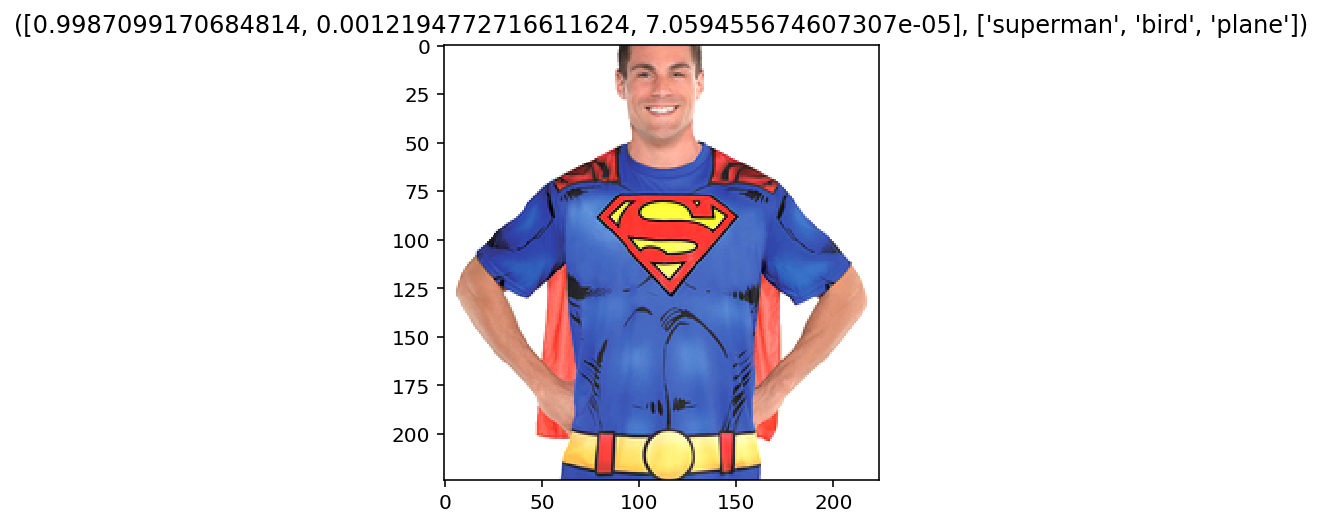

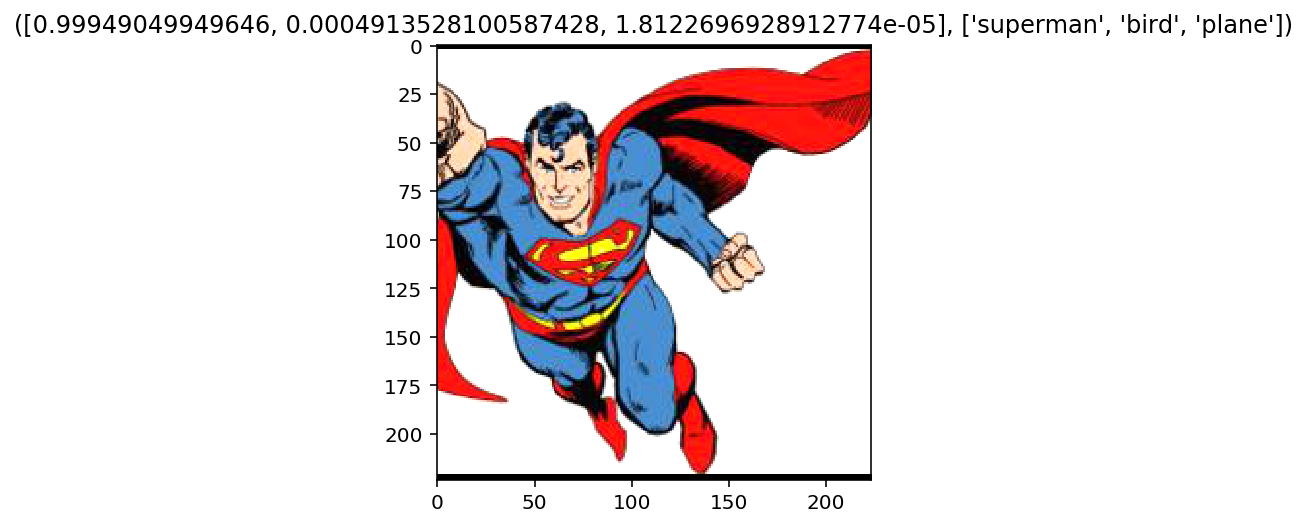

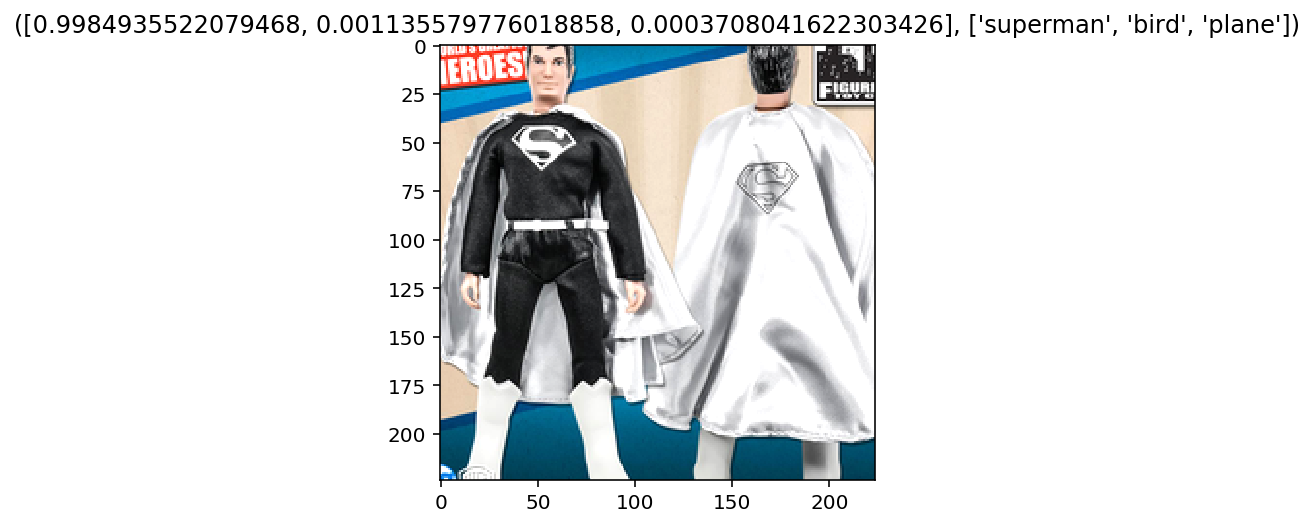

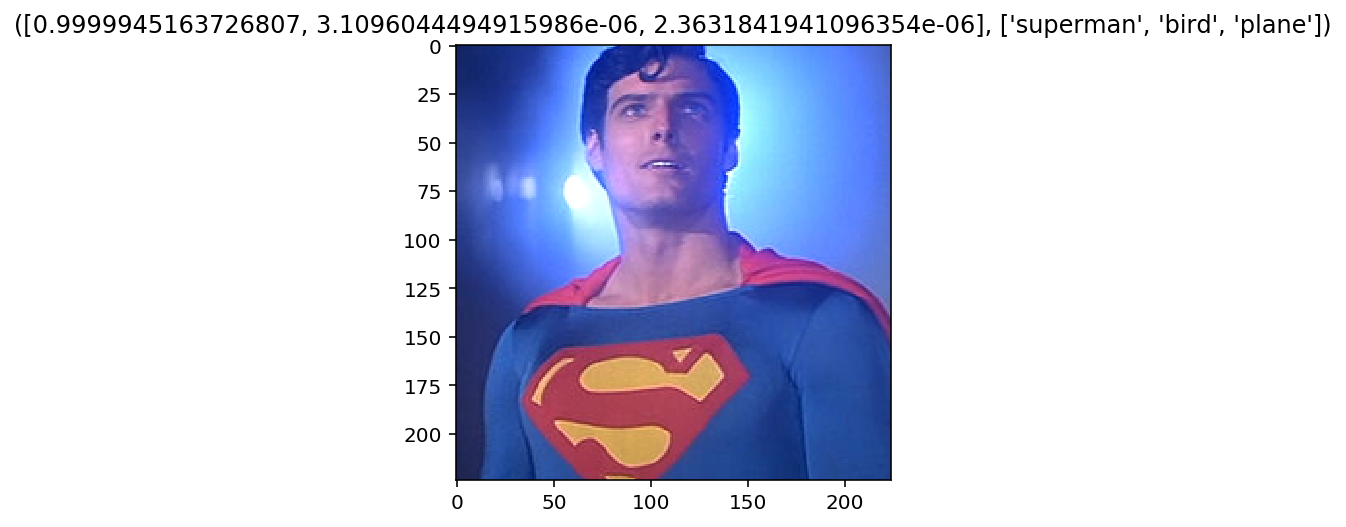

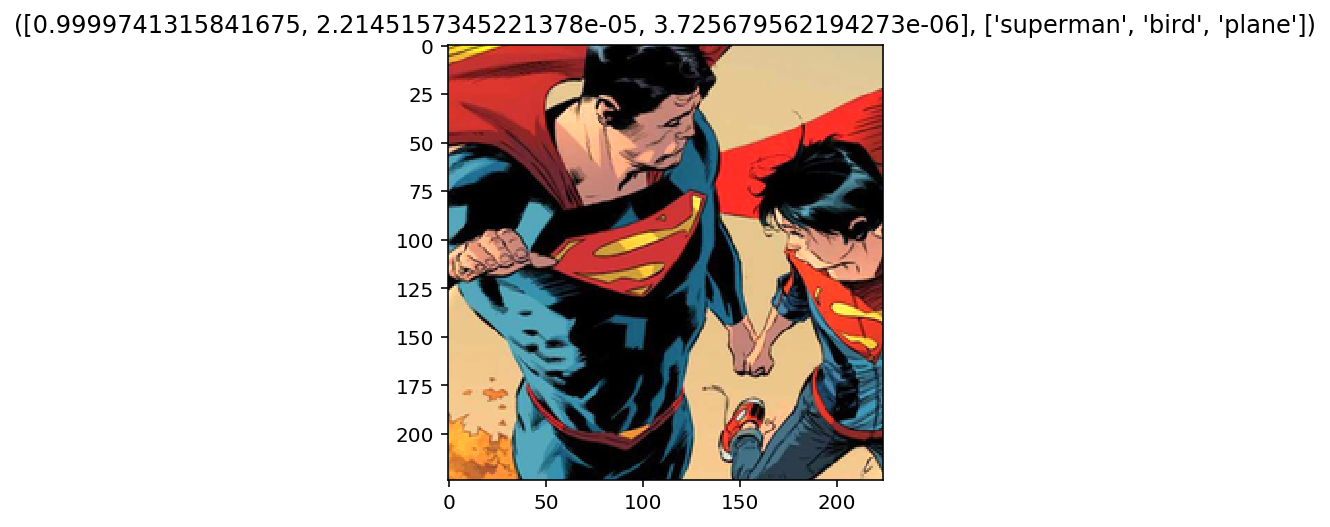

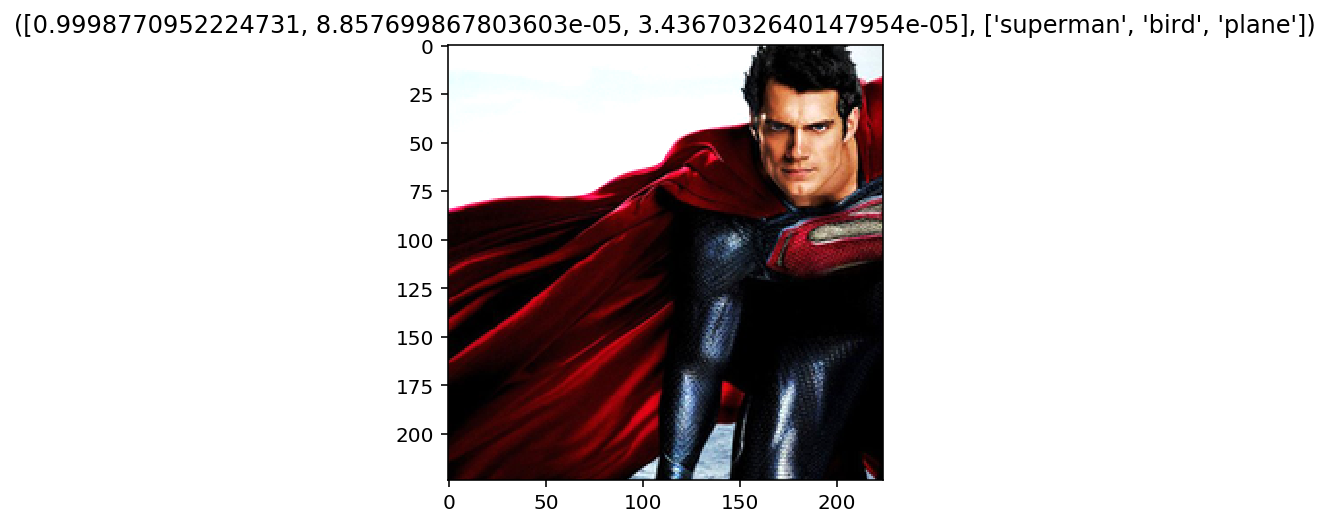

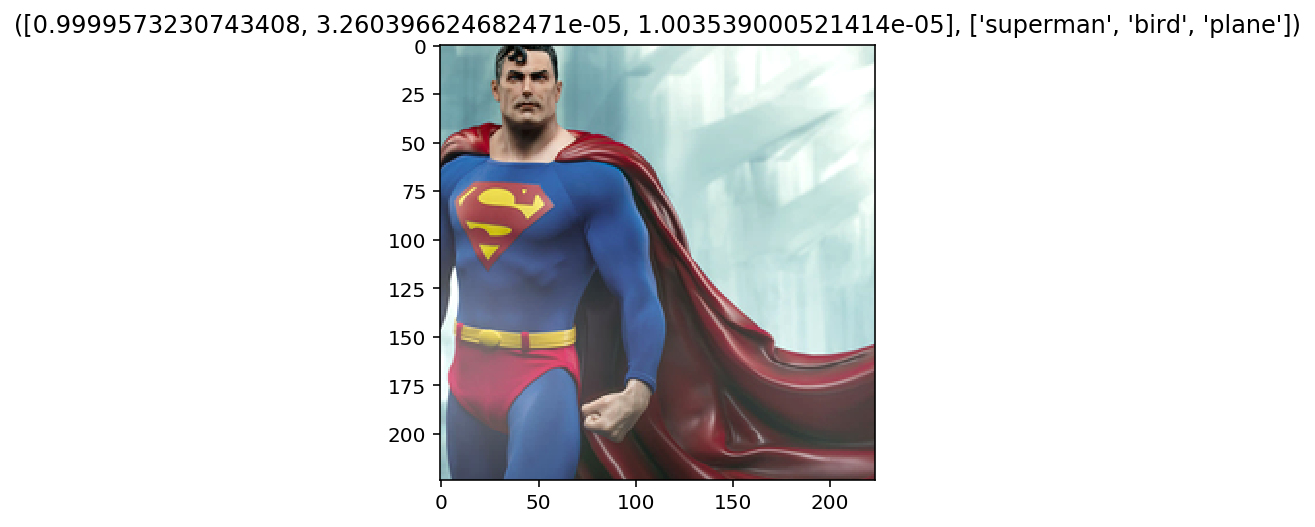

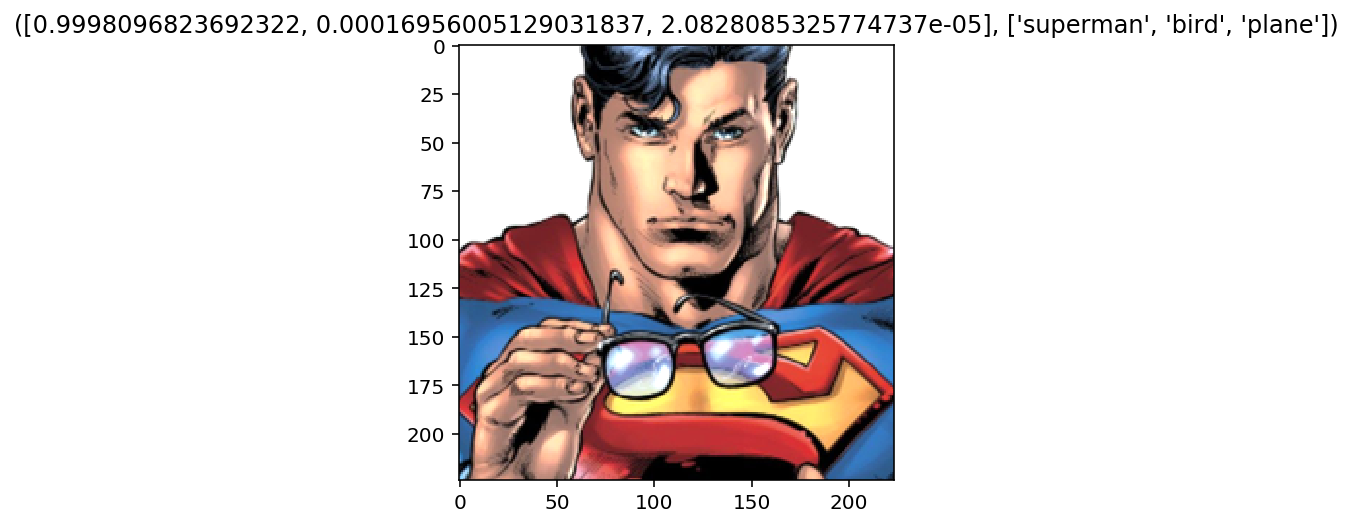

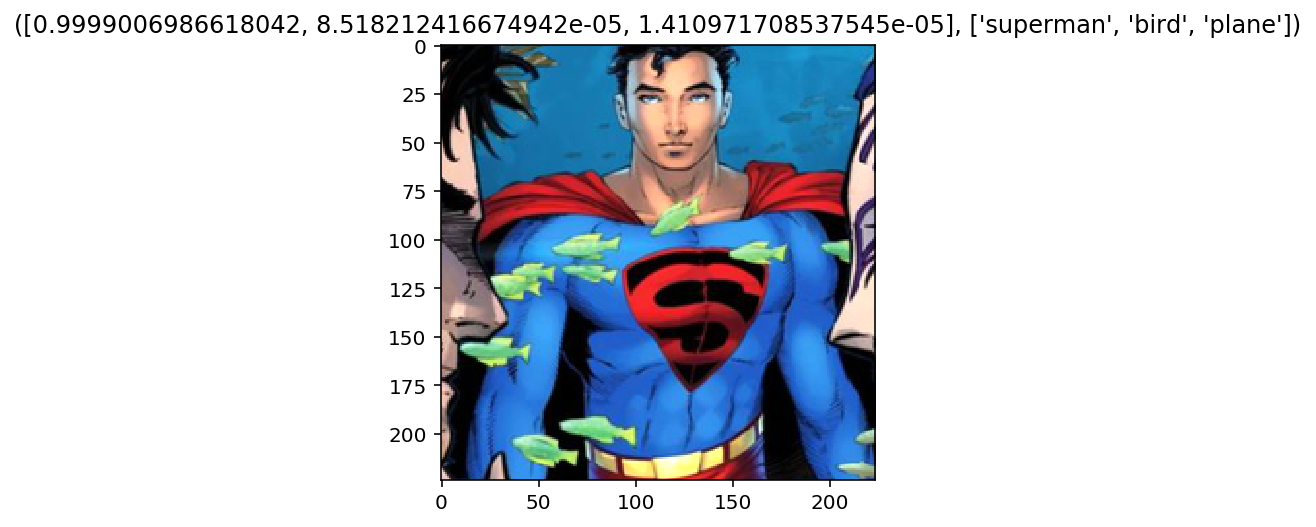

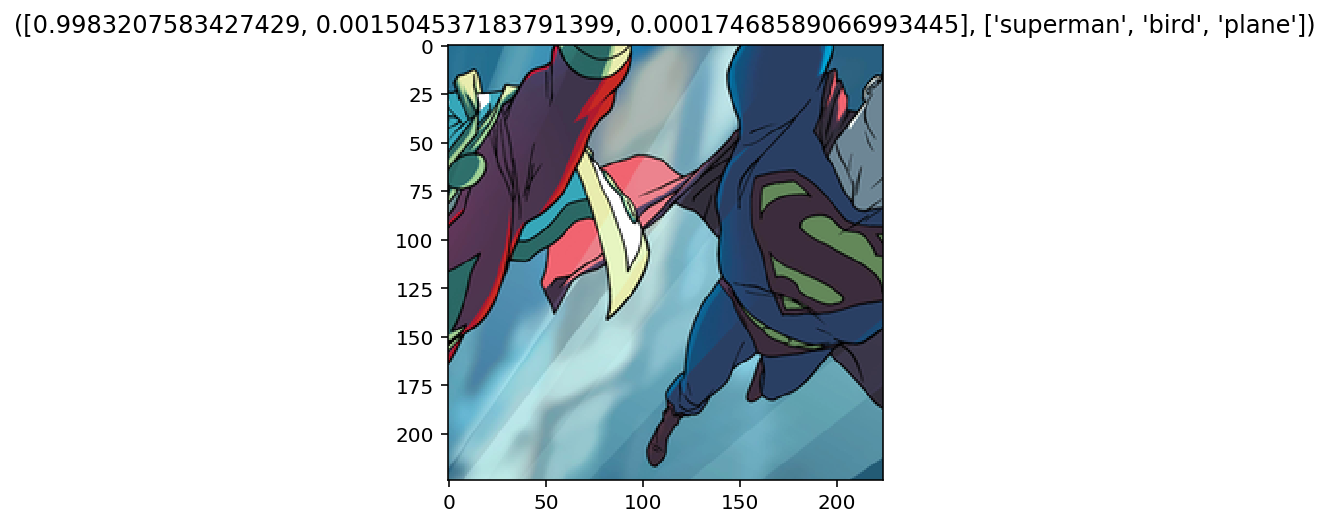

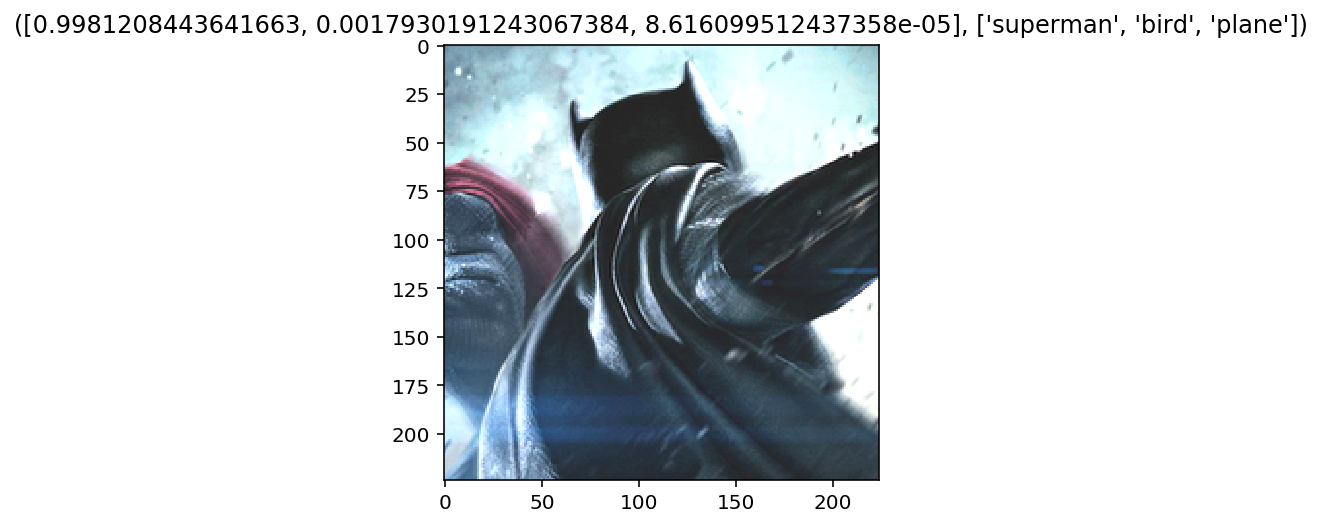

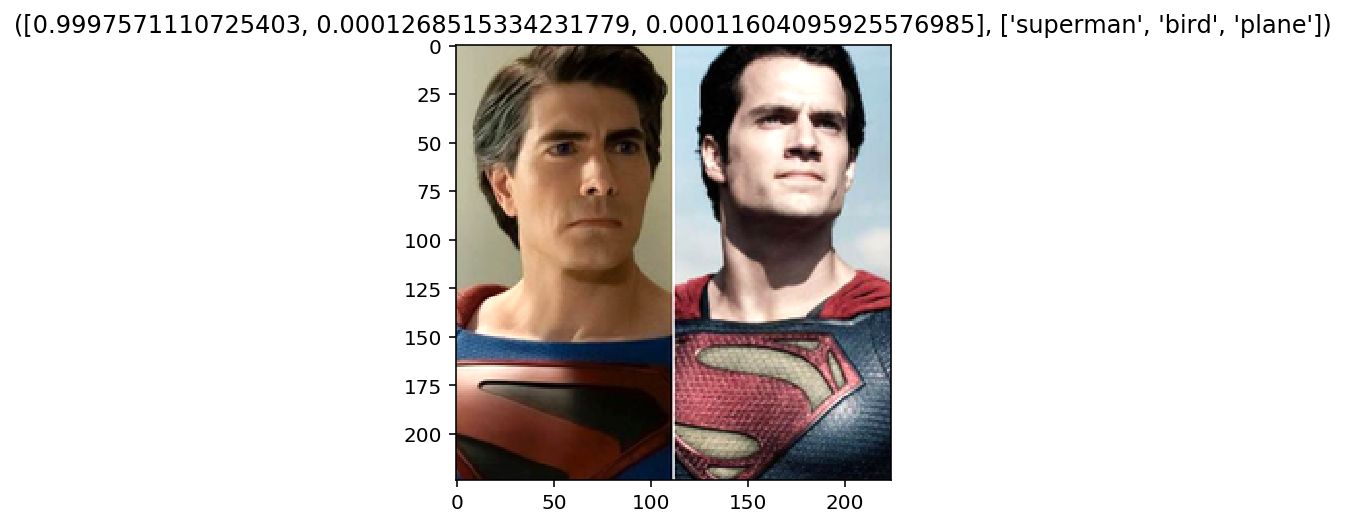

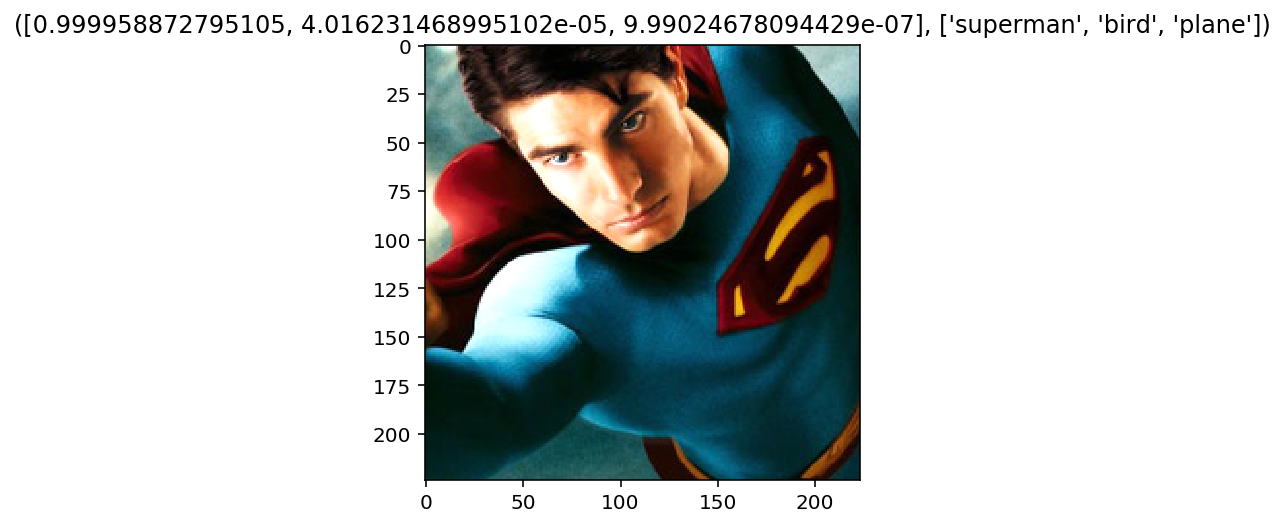

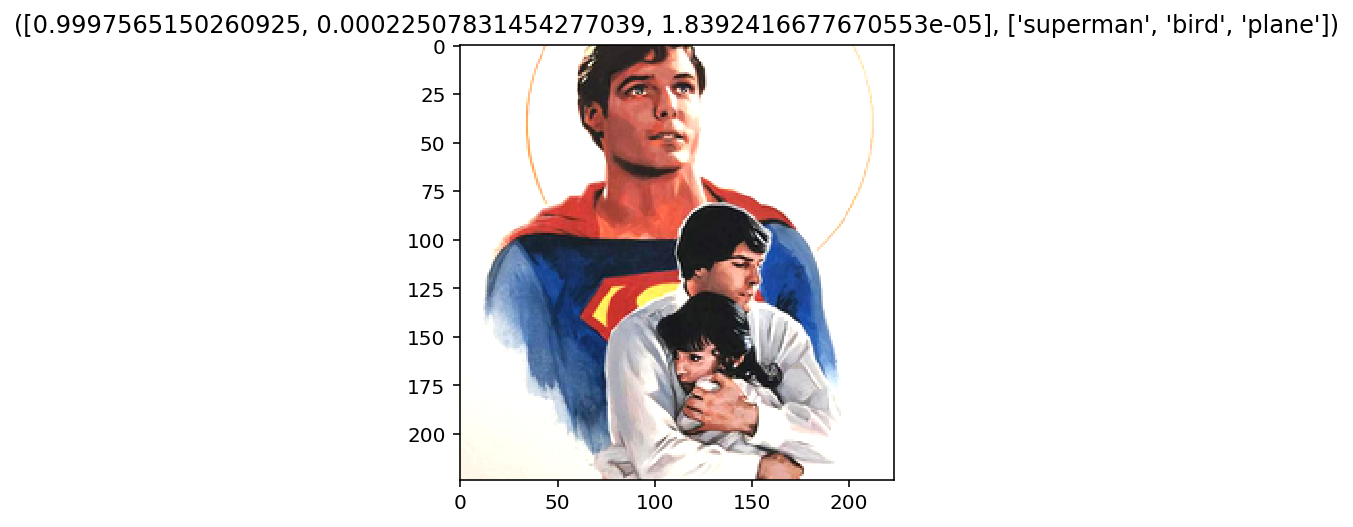

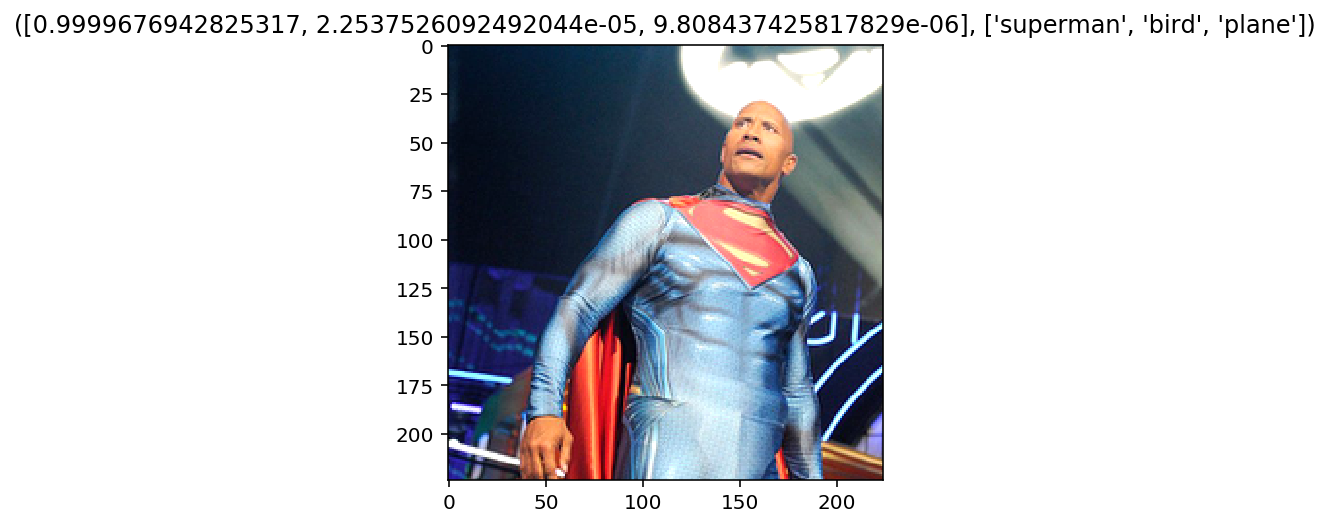

In [214]:
vis_prediction(trained_model, "superman" ,cuda)